<a href="https://colab.research.google.com/github/engelbertflorescarrio/datasets/blob/master/09072021_Proyecto_IN_EA_EF_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROYECTO FINAL DIPLOMADO EN INTELIGENCIA DE NEGOCIOS**

##**Integrantes:** 

* ### Elías Aguilera
* ### Engelbert Flores
* ### Isabel Apel

##**1. Introducción**: (falta desarrollarlo)

Una Entidad Financiera se enfrenta al problema de altas tasas de fuga voluntaria. La institución no tiene claro cuál es el perfil característico que tienen los clientes fugitivos ni cuáles son las razones por las cuáles estos se fugan. 

En consideración a la problemática anterior, se propone:

1. Desarrollar un modelo predictivo que permita identificar tempranamente cuáles clientes son más propensos a fugarse.
2. Definir una serie de políticas comerciales que permitan retener a estos potenciales clientes fugitivos.

Explicar que se utilizará KDD como modelo de trabajo....
***

##**2. Análisis Exploratorio de Datos:**

###**Importación de módulos para el manejo de datos:**

In [ ]:
# Manipulación de datos:
import pandas as pd
import numpy as np
import scipy

# Visualización de datos:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
sns.set(style='white', palette='Set2')
import missingno as msno

# Imputación de datos:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Transfomación de datos:
from sklearn.preprocessing import MinMaxScaler

# Balanceo de clases
from imblearn.under_sampling import RandomUnderSampler #Undersampling
from collections import Counter
from imblearn.over_sampling import RandomOverSampler #Oversampling
from imblearn.over_sampling import SMOTE #SMOTE

# Clasificación (modelos):
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # Logit
from sklearn.tree import DecisionTreeClassifier # Árbol de decisión
from sklearn import tree # Gráfico Árbol de Decisión
from sklearn.svm import SVC # Support Vector Machine (SVM)
from sklearn.ensemble import RandomForestClassifier # Random Forest

# Clasificación (métricas de desempeño):
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve


# Balanceo de clases
from imblearn.under_sampling import RandomUnderSampler #Undersampling
from collections import Counter
from imblearn.over_sampling import RandomOverSampler #Oversampling
from imblearn.over_sampling import SMOTE #SMOTE

#


###**2.1 Importación de Datos, inspección de datos perdidos y outliers**


####Descripción e información de las variables



In [ ]:
# Se importan los datos de archivo 'csv' y se crea dataframe llamado 'basefuga'
basefuga = pd.read_csv('https://raw.githubusercontent.com/ssantanar/datasets/master/fuga/BASEFUGA_GENERAL.csv', sep=",")

print("Cantidad de Filas y Columnas:", basefuga.shape) #se indica el universo de los datos: 2294 filas y 20 columnas
print('Nombre columnas:', basefuga.columns) #se indica el nombre de las columnas
basefuga.replace({'FUGA':{"FUGA":"SI","NO FUGA":"NO"}}, inplace=True) # Se reemplazó los valores 'FUGA' y 'NO FUGA' por "SI" y "NO" en la variable 'FUGA'.
basefuga.head(10) #se muestran primeras 10 filas del dataframe

Cantidad de Filas y Columnas: (2294, 20)
Nombre columnas: Index(['ID', 'GENERO', 'RENTA', 'EDAD', 'NIV_EDUC', 'E_CIVIL', 'COD_OFI',
       'COD_COM', 'CIUDAD', 'D_Marzo', 'D_Abril', 'D_Mayo', 'D_Junio',
       'D_Julio', 'D_Agosto', 'D_Septiembre', 'M_MOROSO', 'MONTO', 'SEGURO',
       'FUGA'],
      dtype='object')


,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
0,1,M,746476,39.0,MED,CAS,68,213.0,LOS ANGELES,0,38292,0,434357,1766,9110,340,2,2000000,NO,NO
1,2,F,11901,49.0,MED,VIU,16,89.0,SANTIAGO,0,0,0,0,48,0,0,1,7500000,SI,NO
2,3,M,1651421,39.0,TEC,CAS,90,16.0,ANTOFAGASTA,0,604169,0,0,323,26489,2925,1,8000000,NO,NO
3,4,F,638969,36.0,UNV,CAS,85,115.0,SANTIAGO,0,5125,0,198998,94,0,105,1,2600000,NO,NO
4,5,M,860113,44.0,TEC,CAS,45,80.0,SANTIAGO,0,11946,0,73959,149,0,272,1,6400000,NO,NO
5,6,M,329463,40.0,TEC,CAS,53,92.0,SANTIAGO,0,187538,0,12008,641,118,154,2,7700000,NO,SI
6,7,M,28732,45.0,UNV,CAS,55,90.0,SANTIAGO,559984,532706,0,0,1464,15600,1523,1,2900000,NO,SI
7,8,F,11563,41.0,TEC,SOL,47,112.0,SANTIAGO,0,141317,0,525325,13,0,477,1,2100000,SI,NO
8,9,F,3044549,33.0,MED,CAS,22,1.0,ARICA,0,102078,0,0,44,0,0,1,1600000,NO,NO
9,10,F,3632707,39.0,MED,VIU,27,89.0,SANTIAGO,0,162658,0,445896,865,0,907,1,2800000,NO,NO


In [ ]:
basefuga.info() #Muestra información de los atributos de la tabla: tipo de dato, cantidad de registros, cuántos no son valores nulos, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2294 non-null   int64  
 1   GENERO        2283 non-null   object 
 2   RENTA         2294 non-null   int64  
 3   EDAD          2292 non-null   float64
 4   NIV_EDUC      2283 non-null   object 
 5   E_CIVIL       2283 non-null   object 
 6   COD_OFI       2294 non-null   int64  
 7   COD_COM       2291 non-null   float64
 8   CIUDAD        2291 non-null   object 
 9   D_Marzo       2294 non-null   int64  
 10  D_Abril       2294 non-null   int64  
 11  D_Mayo        2294 non-null   int64  
 12  D_Junio       2294 non-null   int64  
 13  D_Julio       2294 non-null   int64  
 14  D_Agosto      2294 non-null   int64  
 15  D_Septiembre  2294 non-null   int64  
 16  M_MOROSO      2294 non-null   int64  
 17  MONTO         2294 non-null   int64  
 18  SEGURO        2294 non-null 

*  La base de datos contiene 14 columnas con valores numéricos 'enteros' y 'decimales', y 6 columnas que contienen datos de 'texto'.
*  Hay 6 columnas: "GÉNERO, EDAD, NIV_EDUC, E_CIVIL, COD_COM y CIUDAD" que contienen valores nulos.

In [ ]:
basefuga.describe() # Se muestra información estadística del conjunto de datos, omitiendo aquellas columnas que no contienen números.

,ID,RENTA,EDAD,COD_OFI,COD_COM,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO
count,2294.000000,2.294000e+03,2292.000000,2294.000000,2291.000000,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2294.000000,2294.000000,2294.000000,2294.000000,2.294000e+03
mean,1147.500000,8.527563e+05,43.551920,68.542720,107.945002,1.530206e+05,2.726810e+05,1.032315e+05,1.899761e+05,566.848736,3578.760680,1940.639494,1.250218,3.477092e+06
std,662.365081,1.379715e+06,8.875511,40.164768,84.773031,4.981875e+05,4.023257e+05,8.706984e+05,6.705042e+05,1075.329388,8942.383207,9868.816840,0.751906,2.292933e+06
min,1.000000,1.760000e+02,-50.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5.000000e+05
25%,574.250000,1.003815e+05,39.000000,31.000000,80.000000,0.000000e+00,1.767425e+04,0.000000e+00,0.000000e+00,7.000000,0.000000,0.000000,1.000000,1.700000e+06
50%,1147.500000,3.699345e+05,44.000000,56.000000,90.000000,0.000000e+00,1.344745e+05,0.000000e+00,5.502000e+03,146.000000,0.000000,56.000000,1.000000,2.600000e+06
75%,1720.750000,8.267582e+05,50.000000,92.000000,118.000000,0.000000e+00,3.744250e+05,0.000000e+00,1.749060e+05,629.750000,1486.250000,497.250000,2.000000,4.800000e+06
max,2294.000000,8.454317e+06,130.000000,155.000000,516.000000,9.458161e+06,5.495534e+06,1.839696e+07,2.063461e+07,11187.000000,88837.000000,249652.000000,3.000000,8.000000e+06


*  Se pueden ver valores extremos o outliers y valores erróneos en la variable 'EDAD' (valor mínimo: -50 años y valor máximo: 130 años).
*  En las demás variables no se observan valores extraños.

In [ ]:
# Explorando la cantidad de observaciones de la variable que buscamos predecir (FUGA):
pd.value_counts(basefuga['FUGA'])

NO    1157
SI    1137
Name: FUGA, dtype: int64

In [ ]:
# Explorando algunas variables categóricas:

pd.value_counts(basefuga['E_CIVIL']) # cómo se distribuyen las observaciones de la variable 'E_CIVIL' en las 4 categorías

CAS    1429
SOL     642
SEP     114
VIU      98
Name: E_CIVIL, dtype: int64

In [ ]:
pd.value_counts(basefuga['GENERO']) # cómo se distribuyen las observaciones de la variable 'GENERO' en las 2 categorías

M    1385
F     898
Name: GENERO, dtype: int64

In [ ]:
pd.value_counts(basefuga['M_MOROSO']) # cómo se distribuyen las observaciones de la variable 'M_MOROSO' en las 4 categorías

1    1430
2     431
0     241
3     192
Name: M_MOROSO, dtype: int64

In [ ]:
pd.value_counts(basefuga['NIV_EDUC']) # cómo se distribuyen las observaciones de la variable 'NIV_EDUC' en las 5 categorías

UNV    947
TEC    698
MED    615
EUN     12
BAS     11
Name: NIV_EDUC, dtype: int64

####**2.1.1 Datos perdidos**

In [ ]:
# Muestra cuántos valores perdidos hay por columna:
basefuga.isna().sum()

ID               0
GENERO          11
RENTA            0
EDAD             2
NIV_EDUC        11
E_CIVIL         11
COD_OFI          0
COD_COM          3
CIUDAD           3
D_Marzo          0
D_Abril          0
D_Mayo           0
D_Junio          0
D_Julio          0
D_Agosto         0
D_Septiembre     0
M_MOROSO         0
MONTO            0
SEGURO           0
FUGA             0
dtype: int64

[Text(0.5, 1.0, 'Fuga de clientes según nivel educaciconal y renta')]

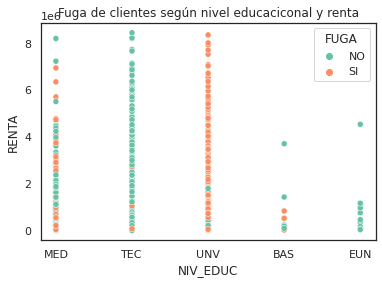

In [ ]:
# Visualización de los datos distribuidos por las variables NIV_EDUC (Nivel educacional del cliente) y RENTA:
sns.scatterplot(x='NIV_EDUC', y='RENTA', hue='FUGA', data=basefuga, palette="Set2").set(title="Fuga de clientes según nivel educaciconal y renta")


### El Gráfico de dispersión muestra a los clientes que se fugan y aquellos que no, según su nivel educacional.
*  Aquellos clientes que se fugan están identificados en color naranjo y los que no se fugan en color verde.
*  Se ve que hay una mayor cantidad de clientes que se fugan en el nivel educacional "UNV: Universitario".
*  Se ve además que hay una mayor cantidad de clientes que no se fugan en el nivel educacional "TEC: Técnico" y "EUN: Educación Universitaria No Completa".  
*  Preliminarmente, no se observa una tendencia clara de 'Fuga' o 'No Fuga' en los clientes que poseen nivel educacional Medio o Básico.

Text(0.5, 1.0, 'Fuga de clientes según Género')

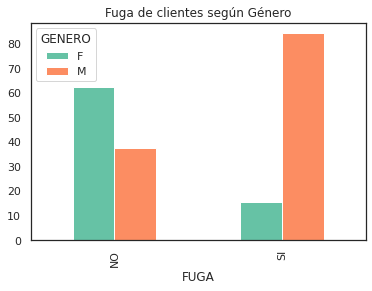

In [ ]:
# Distribución de la variable FUGA por Género.
plot = pd.crosstab(index=basefuga['FUGA'],
            columns=basefuga['GENERO']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
plt.title("Fuga de clientes según Género") # no sé cómo dar vuelta las etiquetas en FUGA

*  Se observa que la mayor cantidad de clientes que **se fugan** son del género MASCULINO (80% del total de fugados * revisar), mientras que la mayor cantidad de clientes que **no se fugan** son del género FEMENINO (60% del total de no fugados *revisar).

[Text(0.5, 1.0, 'Fuga de clientes según los meses de morosidad')]

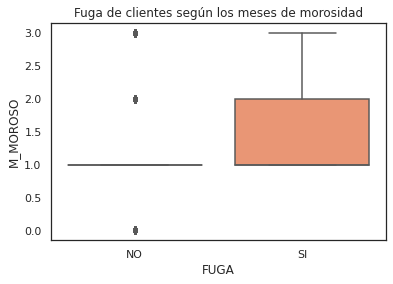

In [ ]:
# M_MOROSO (Meses en mora)
sns.boxplot(x='FUGA', y='M_MOROSO', data=basefuga, palette='Set2', orient='v').set(title="Fuga de clientes según los meses de morosidad")

# Gráfico muestra la distribución de los "meses en mora" de los clientes que se fugaron y aquellos que no.

*  Se observa que no hay clientes fugados que no hayan estado en mora por al menos un mes. La mayoría de los clientes fugados presentaban entre 1 y 2 meses de mora.

[Text(0.5, 1.0, 'Fuga de clientes según monto de crédito preaprobado')]

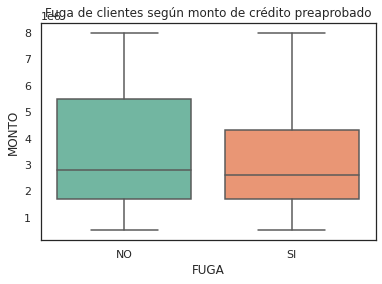

In [ ]:
# MONTO (Monto de crédito preaprobado):
sns.boxplot(x='FUGA', y='MONTO', data=basefuga, palette='Set2', orient='v').set(title="Fuga de clientes según monto de crédito preaprobado")

# Gráfico muestra la distribución del "monto del crédito preaprobado" de los clientes que se fugaron y los que no se fugaron.

*  Se puede observar que el monto de crédito preaprobado de los clientes que SE FUGAN se encuentra en un rango inferior a los clientes que NO SE FUGAN, que el rango es mayor, es decir el monto del crédito preaprobado alcanza valores más altos.

#### **2.1.2 Outliers**

##### Visualización Scatter plot

[Text(0.5, 1.0, 'Fuga de clientes según nivel de renta y edad')]

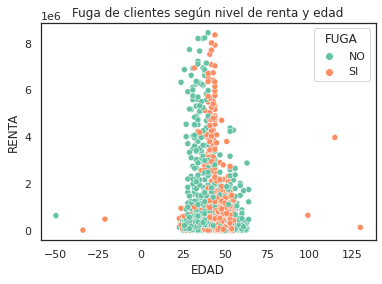

In [ ]:
# Visualización de los datos de fuga y no fuga distribuidos por las variables RENTA y EDAD:
sns.scatterplot(x='EDAD', y='RENTA',  hue='FUGA', data=basefuga, palette="Set2").set(title="Fuga de clientes según nivel de renta y edad")


El gráfico nos muestra que:

*  La mayoría de los clientes se concentran entre los 22 y 65 años aproximadamente.

*  Se pueden ver algunos valores erróneos en la variable "EDAD", donde 3 de ellos son negativos, lo que no es posible. 

*  Se observan unos valores atípicos que están sobre los 100 años.

##### Visualización Box plot

[Text(0.5, 1.0, 'Fuga de clientes según edad')]

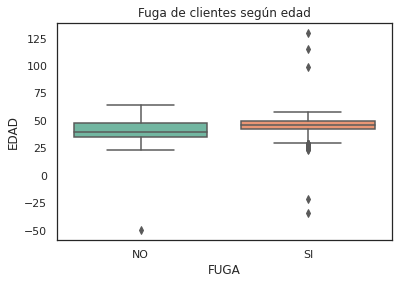

In [ ]:
# Visualización de los datos de fuga y no fuga distribuidos por la variable EDAD (Edad de los clientes):
sns.boxplot(x='FUGA', y='EDAD', data=basefuga, palette='Set2', orient='v').set(title="Fuga de clientes según edad")

*  Se observa un valor anormal en aquellos clientes que **no se fugan**, que corresponde a una persona con una edad negativa de '-50 años'.
*  Además, podemos ver que dentro de los clientes que **se fugan** están los otros valores atípicos y/o extremos. (2 clientes cuya edad es negativa y 3 clientes cuya edad es cercana o superior a 100).

#### **2.1.3 Declarar valores perdidos o inconsistencias**

In [ ]:
# declaramos valores inconsistentes de la columna 'EDAD':
basefuga.loc[basefuga['EDAD'] > 100, 'EDAD'] = np.nan # se deja como valor perdido o inconsistente a los registros de edad mayores a 100 años.
basefuga.loc[basefuga['EDAD'] < 0, 'EDAD'] = np.nan # se deja como valor perdido o inconsistente los menores a 0.

# contamos nuevamente los valores perdidos, luego de declarar valores inconsistentes.
basefuga.isna().sum()

ID               0
GENERO          11
RENTA            0
EDAD             7
NIV_EDUC        11
E_CIVIL         11
COD_OFI          0
COD_COM          3
CIUDAD           3
D_Marzo          0
D_Abril          0
D_Mayo           0
D_Junio          0
D_Julio          0
D_Agosto         0
D_Septiembre     0
M_MOROSO         0
MONTO            0
SEGURO           0
FUGA             0
dtype: int64

##**3. Imputar valores perdidos**

#### **3.1 Omitir observaciones con valores perdidos**

In [ ]:
basefuga = basefuga.dropna() #eliminamos todas las filas donde haya un valor perdido (NaN)
print(f"Filas: {len(basefuga)}") #largo original: 2294
basefuga.head()


Filas: 2251


,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
0,1,M,746476,39.0,MED,CAS,68,213.0,LOS ANGELES,0,38292,0,434357,1766,9110,340,2,2000000,NO,NO
1,2,F,11901,49.0,MED,VIU,16,89.0,SANTIAGO,0,0,0,0,48,0,0,1,7500000,SI,NO
2,3,M,1651421,39.0,TEC,CAS,90,16.0,ANTOFAGASTA,0,604169,0,0,323,26489,2925,1,8000000,NO,NO
3,4,F,638969,36.0,UNV,CAS,85,115.0,SANTIAGO,0,5125,0,198998,94,0,105,1,2600000,NO,NO
4,5,M,860113,44.0,TEC,CAS,45,80.0,SANTIAGO,0,11946,0,73959,149,0,272,1,6400000,NO,NO


*  Del total de filas originales (2294), luego de aplicar la función .dropna() quedaron (2251) filas. Esto muestra que se eliminaron 43 filas, que por la cantidad de datos no es mucho.

In [ ]:
basefuga.isna().sum() #confirmamos que no hay valores perdidos

ID              0
GENERO          0
RENTA           0
EDAD            0
NIV_EDUC        0
E_CIVIL         0
COD_OFI         0
COD_COM         0
CIUDAD          0
D_Marzo         0
D_Abril         0
D_Mayo          0
D_Junio         0
D_Julio         0
D_Agosto        0
D_Septiembre    0
M_MOROSO        0
MONTO           0
SEGURO          0
FUGA            0
dtype: int64

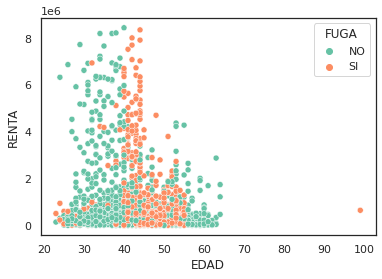

In [ ]:
sns.scatterplot(x='EDAD', y='RENTA', hue='FUGA', data=basefuga, palette="Set2") #cómo se ve la distribución de los valores sin los valores perdidos.

Luego de eliminar las filas que contenían outliers, el gráfico de dispersión cambia y se observan los valores dentro de rangos normales, con la excepción de un valor extremo que se decidió mantener (cliente con una edad cercana a 100 años). 

Algunas observaciones de los datos que podemos ver en el gráfico:

1) La mayoría de los clientes que se fugan tienen entre 40 y 55 años.

2) Los clientes que tienen entre 20 y 36-37 años tienden a fugarse menos. Lo mismo para aquellos que tienen sobre 55 años de edad.

3) Preliminarmente, no se observa relación clara entre el nivel de renta y la fuga de los clientes.

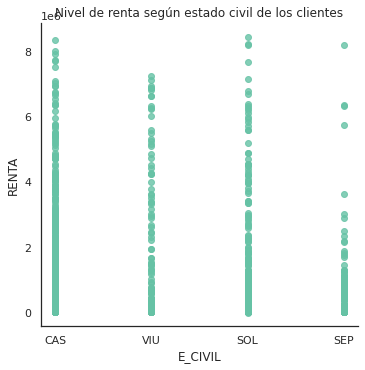

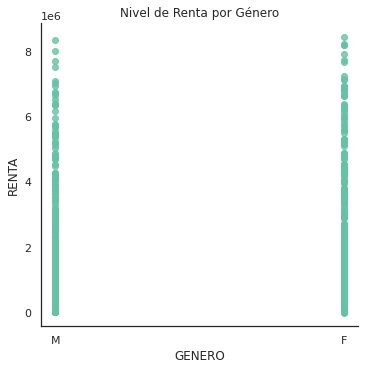

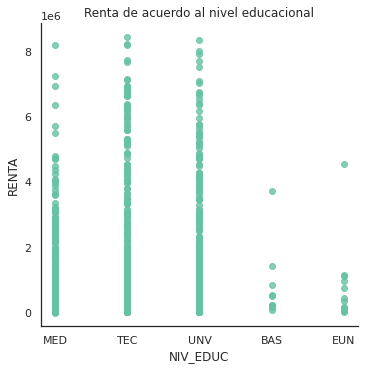

In [ ]:
#ESTOY PROBANDO

sns.lmplot(x="E_CIVIL", y="RENTA", data=basefuga, fit_reg=False, palette="Set2")
plt.title("Nivel de renta según estado civil de los clientes")
plt.show() 
sns.lmplot(x="GENERO", y="RENTA", data=basefuga, fit_reg=False, palette="Set2")
plt.title("Nivel de Renta por Género")
plt.show() 
sns.lmplot(x="NIV_EDUC", y="RENTA", data=basefuga, fit_reg=False, palette="Set2")
plt.title("Renta de acuerdo al nivel educacional")
plt.show()

#### **3.2 Imputación ad-hoc**

In [ ]:
# Se importan los datos y se crea dataframe 'basefuga1'
basefuga1 = pd.read_csv('https://raw.githubusercontent.com/ssantanar/datasets/master/fuga/BASEFUGA_GENERAL.csv', sep=",")
basefuga1.replace({'FUGA':{"FUGA":"SI","NO FUGA":"NO"}}, inplace=True) # Se reemplazó los valores 'FUGA' y 'NO FUGA' por "SI" y "NO" en la variable 'FUGA'.
print(f"Filas: {len(basefuga1)}")

# declaramos valores inconsistentes en la columna 'EDAD'
basefuga1.loc[basefuga1['EDAD'] < 0, 'EDAD'] = np.nan
basefuga1.loc[basefuga1['EDAD'] > 100, 'EDAD'] = np.nan

# contamos valores perdidos
basefuga1.isna().sum()

Filas: 2294


ID               0
GENERO          11
RENTA            0
EDAD             7
NIV_EDUC        11
E_CIVIL         11
COD_OFI          0
COD_COM          3
CIUDAD           3
D_Marzo          0
D_Abril          0
D_Mayo           0
D_Junio          0
D_Julio          0
D_Agosto         0
D_Septiembre     0
M_MOROSO         0
MONTO            0
SEGURO           0
FUGA             0
dtype: int64

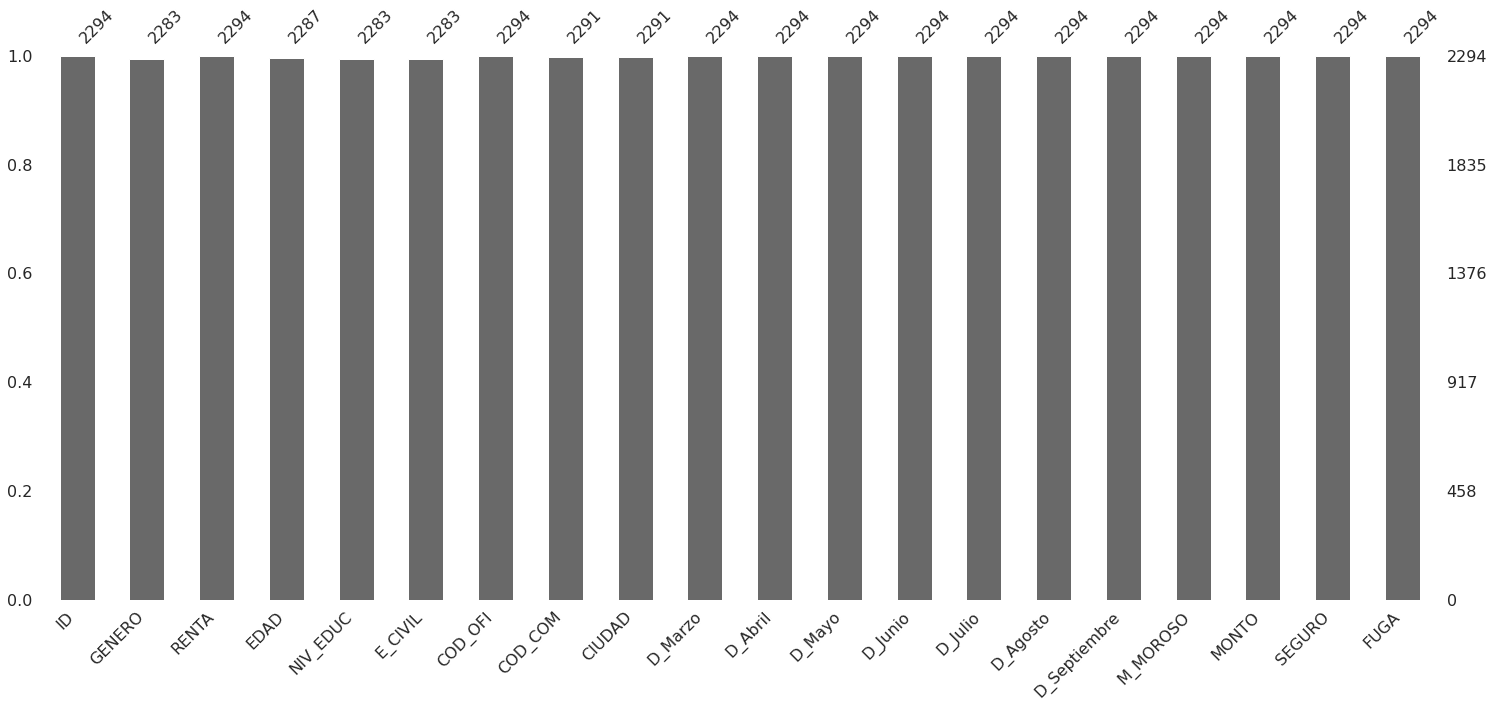

In [ ]:
# Gráfico muestra todos los valores no perdidos para cada variable.
msno.bar(basefuga1)

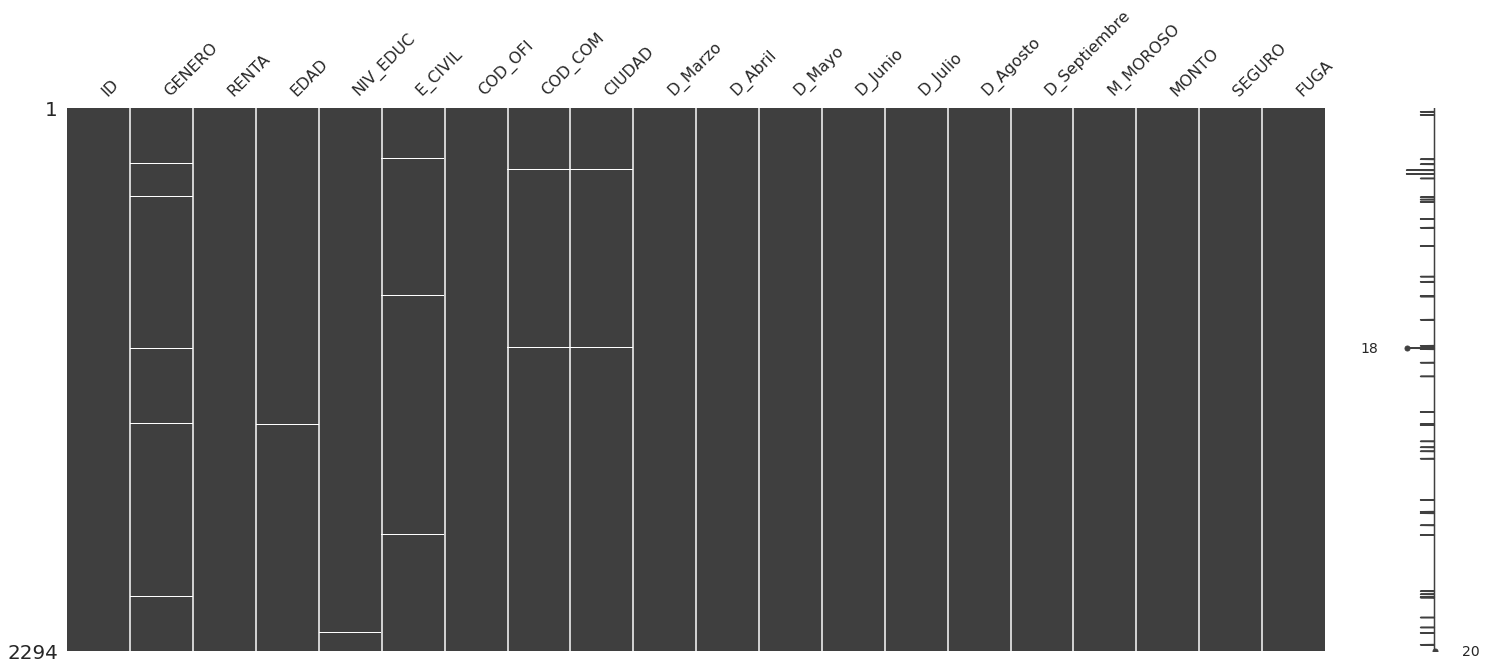

In [ ]:
msno.matrix(basefuga1) #Las líneas blancas del siguiente gráfico representan los valores perdidos. 
# Mediante este gráfico es más fácil encontrar patrones y vínculos existentes entre los valores perdidos en las diferentes variables.

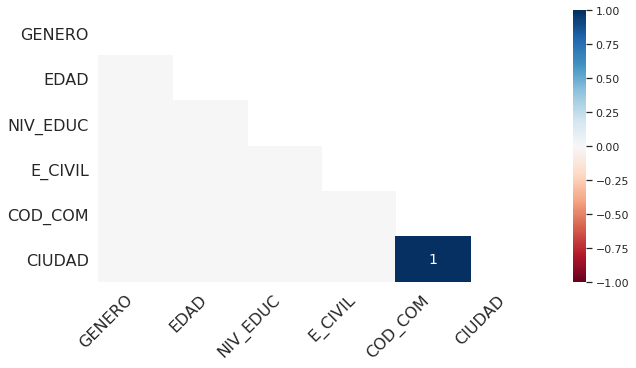

In [ ]:
#Mapa de calor faltante o Mapa de correlación: este método crea el gráfico de correlación de los valores perdidos entre columnas/variables. Explica las dependencias de los valores faltantes entre columnas.
msno.heatmap(basefuga1, figsize=(10,5)) 

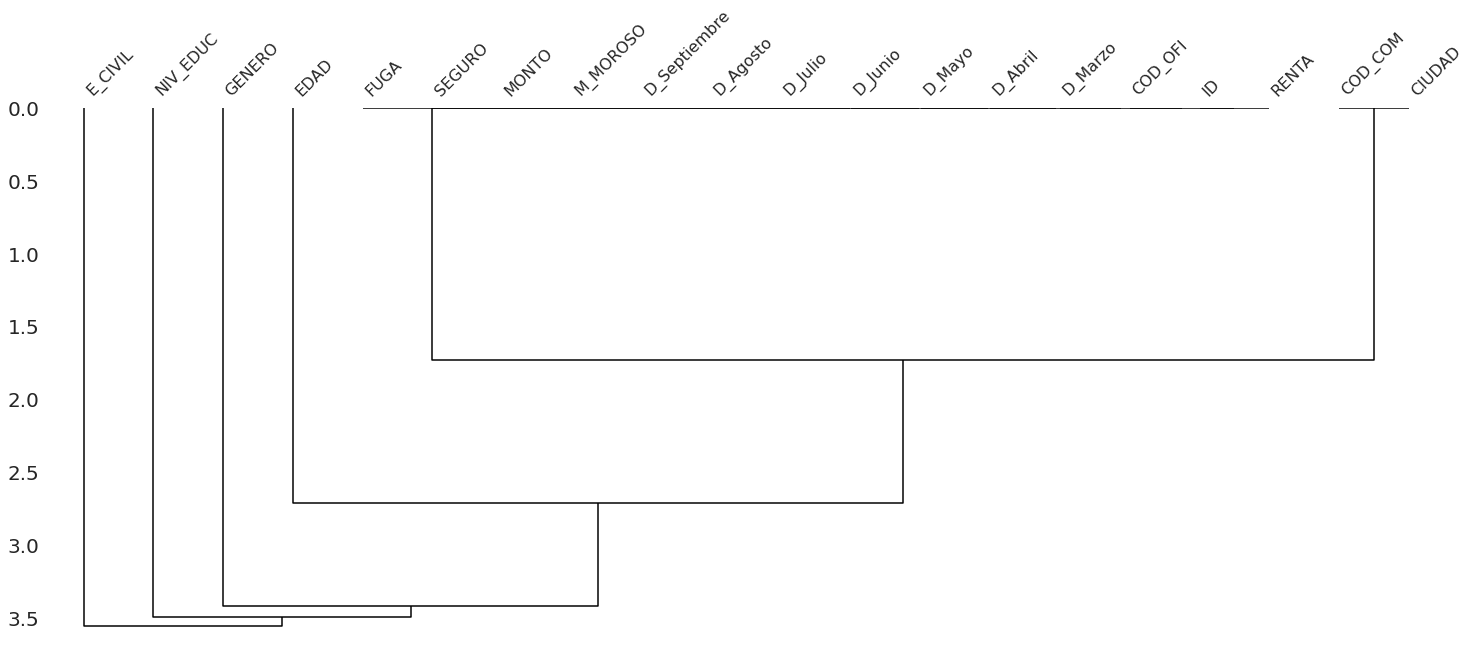

In [ ]:
#Dendrograma de ausencias: es un diagrama de árbol de ausencias. Describe la correlación de variables agrupándolas.
msno.dendrogram(basefuga1)
# Muestra que COD_COM y CIUDAD están altamente correlacionadas; que desde la variables 'FUGA' a 'RENTA' están vinculadas entre sí en el nivel '0' y predicen completamente la presencia de las demás, 
# o también, quiere decir que no faltan valores.

In [ ]:
# GENERO
# se presentan 11 valores perdidos dentro del conjunto. Se decide reemplazar por la moda de esta variable, que es categórica.
basefuga1['GENERO'].fillna(basefuga1['GENERO'].mode().iloc[0], inplace=True)

# EDAD
# Se reemplazan los valores perdidos (7) por valores medios de la variable.
basefuga1['EDAD'] = basefuga1['EDAD'].fillna(np.mean(basefuga1['EDAD']))

# NIV_EDUC
# Se reemplazan los valores perdidos (11) por la moda, al ser una variable categórica.
basefuga1['NIV_EDUC'].fillna(basefuga1['NIV_EDUC'].mode().iloc[0], inplace=True)

# E_CIVIL
# Se reemplazan los valores perdidos (11) por la moda, al ser una variable categórica.
basefuga1['E_CIVIL'].fillna(basefuga1['E_CIVIL'].mode().iloc[0], inplace=True)

# COD_COM
# Se reemplazan los valores perdidos (3) por el último valor válido de la columna, que contiene datos del tipo string.
basefuga1['COD_COM'].ffill(axis=0, inplace=True)

# CIUDAD
# Se reemplazan los valores perdidos (3) por el último valor válido de la columna, que contiene datos del tipo string.
basefuga1['CIUDAD'].ffill(axis=0, inplace=True)

# Contamos nuevamente los valores perdidos:
basefuga1.isna().sum()

ID              0
GENERO          0
RENTA           0
EDAD            0
NIV_EDUC        0
E_CIVIL         0
COD_OFI         0
COD_COM         0
CIUDAD          0
D_Marzo         0
D_Abril         0
D_Mayo          0
D_Junio         0
D_Julio         0
D_Agosto        0
D_Septiembre    0
M_MOROSO        0
MONTO           0
SEGURO          0
FUGA            0
dtype: int64

#### 3.3 Método de imputación múltiple

In [ ]:
# Se importan los datos y se crea el dataframe 'basefuga2'
basefuga2 = pd.read_csv('https://raw.githubusercontent.com/ssantanar/datasets/master/fuga/BASEFUGA_GENERAL.csv', sep=",")
basefuga2.replace({'FUGA':{"FUGA":"SI","NO FUGA":"NO"}}, inplace=True) # Se reemplazó los valores de la variable "FUGA" por "SI" y "NO.
basefuga2.replace({'NIV_EDUC':{'BAS':1, 'MED':2, 'TEC': 3, 'EUN': 4, 'UNV':5}}, inplace=True) #se reemplazaron los valores de la variable "NIV_EDUC" que contiene 5 categorías, por valores numéricos.
basefuga2.replace({'E_CIVIL':{'SOL':1, 'CAS':2, 'SEP':3, 'VIU': 4}}, inplace=True) #se reemplazaron los valores de la variable "E_CIVIL" que contiene 4 categorías, por valores numéricos.
basefuga2.replace({'GENERO':{'M':0, 'F':1}}, inplace=True) #se reemplazaron los valores de la variable "GENERO" que contiene 2 categorías, por valores numéricos.
basefuga2.replace({'SEGURO':{'NO':0, 'SI':1}}, inplace=True) #se reemplazaron los valores de la variable "SEGURO" que contiene 2 categorías, por valores numéricos.
print(f"Filas: {len(basefuga2)}")

# declaramos valores inconsistentes en la columna 'EDAD'
basefuga2.loc[basefuga2['EDAD'] < 0, 'EDAD'] = np.nan
basefuga2.loc[basefuga2['EDAD'] > 100, 'EDAD'] = np.nan

# contamos valores perdidos, luego de declarar valores inconsistentes.
basefuga2.isna().sum()

Filas: 2294


ID               0
GENERO          11
RENTA            0
EDAD             7
NIV_EDUC        11
E_CIVIL         11
COD_OFI          0
COD_COM          3
CIUDAD           3
D_Marzo          0
D_Abril          0
D_Mayo           0
D_Junio          0
D_Julio          0
D_Agosto         0
D_Septiembre     0
M_MOROSO         0
MONTO            0
SEGURO           0
FUGA             0
dtype: int64

In [ ]:
# se define el método
mice = IterativeImputer(random_state=0)

# se ajustan los parámetros del método para realizar la imputación
mice.fit(basefuga2._get_numeric_data())

# se realiza la imputación de los valores perdidos
basefuga2[basefuga2._get_numeric_data().columns] = mice.transform(basefuga2._get_numeric_data()).round(3) 

# contamos valores perdidos en variables numéricas
print(basefuga2.isna().sum())
basefuga2.head()


ID              0
GENERO          0
RENTA           0
EDAD            0
NIV_EDUC        0
E_CIVIL         0
COD_OFI         0
COD_COM         0
CIUDAD          3
D_Marzo         0
D_Abril         0
D_Mayo          0
D_Junio         0
D_Julio         0
D_Agosto        0
D_Septiembre    0
M_MOROSO        0
MONTO           0
SEGURO          0
FUGA            0
dtype: int64


,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
0,1.0,0.0,746476.0,39.0,2.0,2.0,68.0,213.0,LOS ANGELES,0.0,38292.0,0.0,434357.0,1766.0,9110.0,340.0,2.0,2000000.0,0.0,NO
1,2.0,1.0,11901.0,49.0,2.0,4.0,16.0,89.0,SANTIAGO,0.0,0.0,0.0,0.0,48.0,0.0,0.0,1.0,7500000.0,1.0,NO
2,3.0,0.0,1651421.0,39.0,3.0,2.0,90.0,16.0,ANTOFAGASTA,0.0,604169.0,0.0,0.0,323.0,26489.0,2925.0,1.0,8000000.0,0.0,NO
3,4.0,1.0,638969.0,36.0,5.0,2.0,85.0,115.0,SANTIAGO,0.0,5125.0,0.0,198998.0,94.0,0.0,105.0,1.0,2600000.0,0.0,NO
4,5.0,0.0,860113.0,44.0,3.0,2.0,45.0,80.0,SANTIAGO,0.0,11946.0,0.0,73959.0,149.0,0.0,272.0,1.0,6400000.0,0.0,NO


*  Se puede observar que la variable CIUDAD mantiene 3 datos perdidos. En el siguiente método se tratarán estos valores.

#### 3.4 Imputer Sklearn (que incluye a la data categórica)

In [ ]:
# volvemos a leer los datos que tienen valores perdidos y creamos el dataframe "basefuga3"
basefuga3 = pd.read_csv('https://raw.githubusercontent.com/ssantanar/datasets/master/fuga/BASEFUGA_GENERAL.csv', sep=",")
# se reemplazan los valores de ciertas variables
basefuga3.replace({'FUGA':{"FUGA":"1","NO FUGA":"0"}}, inplace=True) # Se reemplazó los valores de la variable "FUGA" por "SI" y "NO.
basefuga3.replace({'NIV_EDUC':{'BAS':1, 'MED':2, 'TEC': 3, 'EUN': 4, 'UNV':5}}, inplace=True) #se reemplazaron los valores de la variable "NIV_EDUC" que contiene 5 categorías, por valores numéricos.
basefuga3.replace({'E_CIVIL':{'SOL':1, 'CAS':2, 'SEP':3, 'VIU': 4}}, inplace=True) #se reemplazaron los valores de la variable "E_CIVIL" que contiene 4 categorías, por valores numéricos.
basefuga3.replace({'GENERO':{'M':0, 'F':1}}, inplace=True) #se reemplazaron los valores de la variable "GENERO" que contiene 2 categorías, por valores numéricos.
basefuga3.replace({'SEGURO':{'NO':0, 'SI':1}}, inplace=True) #se reemplazaron los valores de la variable "SEGURO" que contiene 2 categorías, por valores numéricos.

# declaramos valores inconsistentes en la columna 'EDAD'
basefuga3.loc[basefuga3['EDAD'] < 0, 'EDAD'] = np.nan
basefuga3.loc[basefuga3['EDAD'] > 100, 'EDAD'] = np.nan

# contamos valores perdidos, luego de declarar valores inconsistentes.
basefuga3.isna().sum()

ID               0
GENERO          11
RENTA            0
EDAD             7
NIV_EDUC        11
E_CIVIL         11
COD_OFI          0
COD_COM          3
CIUDAD           3
D_Marzo          0
D_Abril          0
D_Mayo           0
D_Junio          0
D_Julio          0
D_Agosto         0
D_Septiembre     0
M_MOROSO         0
MONTO            0
SEGURO           0
FUGA             0
dtype: int64

In [ ]:
# definimos el imputador
imputer_numerical = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# ver que podemos seleccionar los atributos numéricos y categóricos de esta forma
numeric_values = basefuga3.select_dtypes(include=['int','float']).values # valores numéricos
categorical_values = basefuga3.select_dtypes(include=['object']).values # valores categóricos

# guardamos las columnas
numeric_columns = basefuga3.select_dtypes(include=['int','float']).columns
categorical_columns = basefuga3.select_dtypes(include=['object']).columns
  
# imputamos
numeric_values = imputer_numerical.fit_transform(numeric_values)
categorical_values = imputer_categorical.fit_transform(categorical_values)

# trasformamos a dataframe
numeric_values = pd.DataFrame(numeric_values,columns=numeric_columns)
categorical_values = pd.DataFrame(categorical_values,columns=categorical_columns)

# recuperamos el dataframe original
basefuga3 = pd.concat([categorical_values,numeric_values],axis=1)

basefuga3.head()

,CIUDAD,FUGA,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO
0,LOS ANGELES,0,1.0,0.0,746476.0,39.0,2.0,2.0,68.0,213.0,0.0,38292.0,0.0,434357.0,1766.0,9110.0,340.0,2.0,2000000.0,0.0
1,SANTIAGO,0,2.0,1.0,11901.0,49.0,2.0,4.0,16.0,89.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,1.0,7500000.0,1.0
2,ANTOFAGASTA,0,3.0,0.0,1651421.0,39.0,3.0,2.0,90.0,16.0,0.0,604169.0,0.0,0.0,323.0,26489.0,2925.0,1.0,8000000.0,0.0
3,SANTIAGO,0,4.0,1.0,638969.0,36.0,5.0,2.0,85.0,115.0,0.0,5125.0,0.0,198998.0,94.0,0.0,105.0,1.0,2600000.0,0.0
4,SANTIAGO,0,5.0,0.0,860113.0,44.0,3.0,2.0,45.0,80.0,0.0,11946.0,0.0,73959.0,149.0,0.0,272.0,1.0,6400000.0,0.0


In [ ]:
basefuga3.isna().sum() # se imputaron todos los valores perdidos de las variables númericas y categóricas.

CIUDAD          0
FUGA            0
ID              0
GENERO          0
RENTA           0
EDAD            0
NIV_EDUC        0
E_CIVIL         0
COD_OFI         0
COD_COM         0
D_Marzo         0
D_Abril         0
D_Mayo          0
D_Junio         0
D_Julio         0
D_Agosto        0
D_Septiembre    0
M_MOROSO        0
MONTO           0
SEGURO          0
dtype: int64

In [ ]:
basefuga3.CIUDAD.unique() # se muestran los valores únicos dentro de la variable CIUDAD.

array(['LOS ANGELES', 'SANTIAGO', 'ANTOFAGASTA', 'ARICA', 'CONCEPCION',
       'TALCAHUANO', 'TEMUCO', 'RANCAGUA', 'CHUQUICAMATA', 'PUERTO OCTAY',
       'CALAMA', 'PUNTA ARENAS', 'CON-CON', 'VLLA ALEMANA', 'OSORNO',
       'IQUIQUE', 'VINA DEL MAR', 'TALAGANTE', 'LA SERENA', 'SAN FELIPE',
       'RENGO', 'CASTRO', 'CHILLAN', 'COLBUN', 'PENAFLOR', 'VALDIVIA',
       'EL SALVADOR', 'COYHAIQUE', 'ANCUD', 'COQUIMBO', 'LONCOCHE',
       'CURICO', 'LOS ANDES', 'SAN CLEMENTE', 'PALENA', 'LLANQUIHUE',
       'LLO-LLEO', 'SAN PABLO', 'QUILPUE', 'CALDERA', 'MELIPILLA',
       'TALCA', 'SAN FERNANDO', 'PUERTO MONTT', 'QUILLOTA', 'VALPARAISO',
       'LA CALERA', 'STO DOMINGO', 'CURACAVI', 'AYSEN', 'LOS VILOS',
       'PANGUIPULLI', 'CORONEL', 'COPIAPO', 'PUERTO VARAS', 'LINARES',
       'SAN PEDRO', 'TOCOPILLA', 'ANGOL', 'PARRAL', 'SAN ESTEBAN',
       'HIJUELAS', 'SAN ANTONIO', 'MACHALI', 'VALLENAR', 'CALBUCO',
       'SANTA CRUZ', 'HUASCO', 'LOS LAGOS', 'VILLARRICA', 'LA CRUZ',
       'PETORCA

In [ ]:
# Se importa la función 'LabelEncoder' para codificar etiquetas de una variable categórica en valores numéricos
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
labels = label_encode.fit_transform(basefuga3.CIUDAD) # se aplica la función a la variable CIUDAD del dataset 'basefuga3' que no contiene valores perdidos.
# agregando las etiquetas al dataframe 'basefuga3'
basefuga3['CIUDAD'] = labels
labels = label_encode.fit_transform(basefuga3.CIUDAD)

basefuga3.head()

,CIUDAD,FUGA,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO
0,33,0,1.0,0.0,746476.0,39.0,2.0,2.0,68.0,213.0,0.0,38292.0,0.0,434357.0,1766.0,9110.0,340.0,2.0,2000000.0,0.0
1,62,0,2.0,1.0,11901.0,49.0,2.0,4.0,16.0,89.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,1.0,7500000.0,1.0
2,2,0,3.0,0.0,1651421.0,39.0,3.0,2.0,90.0,16.0,0.0,604169.0,0.0,0.0,323.0,26489.0,2925.0,1.0,8000000.0,0.0
3,62,0,4.0,1.0,638969.0,36.0,5.0,2.0,85.0,115.0,0.0,5125.0,0.0,198998.0,94.0,0.0,105.0,1.0,2600000.0,0.0
4,62,0,5.0,0.0,860113.0,44.0,3.0,2.0,45.0,80.0,0.0,11946.0,0.0,73959.0,149.0,0.0,272.0,1.0,6400000.0,0.0


##**4. Transformación**

In [ ]:
# A partir del dataset "basefuga3" se crean nuevas variables: "DEUDA_TOTAL" (total adeudado en los últimos 7 meses), 
#"DEUDA PROM MENS" (deuda promedio mensual de esos 7 meses) y "DEUDA PROM MENS/RENTA" (deuda promedio mensual sobre a la renta).
basefuga3['DEUDA_TOTAL'] = basefuga3['D_Marzo'] + basefuga3['D_Abril'] + basefuga3['D_Mayo'] + basefuga3['D_Junio'] + basefuga3['D_Julio'] + basefuga3['D_Agosto'] + basefuga3['D_Septiembre'] 
basefuga3['DEUDA PROM MENS'] = basefuga3['DEUDA_TOTAL']/7
basefuga3['DEUDA PROM MENS/RENTA'] = basefuga3['DEUDA PROM MENS'] / basefuga3['RENTA']

# Se eliminan las variables de "deuda mensual" de marzo a septiembre, por ser información redundante y que logramos capturar en las variables creadas anteriormente.
basefuga3.drop(['D_Marzo','D_Abril','D_Mayo','D_Junio','D_Julio','D_Agosto','D_Septiembre'], axis = 'columns', inplace=True)

basefuga3.head()

,CIUDAD,FUGA,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,M_MOROSO,MONTO,SEGURO,DEUDA_TOTAL,DEUDA PROM MENS,DEUDA PROM MENS/RENTA
0,33,0,1.0,0.0,746476.0,39.0,2.0,2.0,68.0,213.0,2.0,2000000.0,0.0,483865.0,69123.571429,0.092600
1,62,0,2.0,1.0,11901.0,49.0,2.0,4.0,16.0,89.0,1.0,7500000.0,1.0,48.0,6.857143,0.000576
2,2,0,3.0,0.0,1651421.0,39.0,3.0,2.0,90.0,16.0,1.0,8000000.0,0.0,633906.0,90558.000000,0.054836
3,62,0,4.0,1.0,638969.0,36.0,5.0,2.0,85.0,115.0,1.0,2600000.0,0.0,204322.0,29188.857143,0.045681
4,62,0,5.0,0.0,860113.0,44.0,3.0,2.0,45.0,80.0,1.0,6400000.0,0.0,86326.0,12332.285714,0.014338


In [ ]:
# Aplicamos logaritomo a los atributos que presentan gran dispersión: 'RENTA', EDAD', 'DEUDA_TOTAL', 'DEUDA PROM MENS' y 'MONTO'.
basefuga3['LOG_RENTA'] = np.log(basefuga3['RENTA']+1) # agregamos el 1 para evitar que se indetermine el logaritmo
basefuga3['LOG_EDAD'] = np.log(basefuga3['EDAD']+1)
basefuga3['LOG_DEUDA_TOTAL'] = np.log(basefuga3['DEUDA_TOTAL']+1)
basefuga3['LOG_D_PROM_MENS'] = np.log(basefuga3['DEUDA PROM MENS']+1)
basefuga3['LOG_MONTO'] = np.log(basefuga3['MONTO']+1) 
basefuga3.tail()

,CIUDAD,FUGA,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,M_MOROSO,MONTO,SEGURO,DEUDA_TOTAL,DEUDA PROM MENS,DEUDA PROM MENS/RENTA,LOG_RENTA,LOG_EDAD,LOG_DEUDA_TOTAL,LOG_D_PROM_MENS,LOG_MONTO
2289,62,0,2290.0,1.0,205041.0,43.0,3.0,1.0,82.0,108.0,3.0,1100000.0,1.0,650993.0,92999.000000,0.453563,12.230970,3.784190,13.386256,11.440355,13.910822
2290,13,1,2291.0,0.0,70335.0,54.0,3.0,1.0,27.0,226.0,1.0,1800000.0,0.0,1270582.0,181511.714286,2.580674,11.161039,4.007333,14.054986,12.109081,14.403298
2291,3,1,2292.0,0.0,725881.0,51.0,5.0,1.0,138.0,1.0,1.0,4200000.0,0.0,730901.0,104414.428571,0.143845,13.495143,3.951244,13.502035,11.556133,15.250595
2292,62,1,2293.0,0.0,4034859.0,42.0,5.0,2.0,55.0,90.0,2.0,4600000.0,0.0,665746.0,95106.571429,0.023571,15.210482,3.761200,13.408665,11.462764,15.341567
2293,62,1,2294.0,0.0,47099.0,49.0,5.0,2.0,55.0,90.0,1.0,2100000.0,0.0,681543.0,97363.285714,2.067205,10.760028,3.912023,13.432116,11.486215,14.557448


In [ ]:
# Se eliminan los atributos a los que se les aplicó logaritmo, para no duplicar información.
basefuga3.drop('RENTA', axis=1, inplace=True)
basefuga3.drop('EDAD', axis=1, inplace=True)
basefuga3.drop('DEUDA_TOTAL', axis=1, inplace=True)
basefuga3.drop('DEUDA PROM MENS', axis=1, inplace=True)
basefuga3.drop('MONTO', axis=1, inplace=True)
basefuga3.head()

,CIUDAD,FUGA,ID,GENERO,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,M_MOROSO,SEGURO,DEUDA PROM MENS/RENTA,LOG_RENTA,LOG_EDAD,LOG_DEUDA_TOTAL,LOG_D_PROM_MENS,LOG_MONTO
0,33,0,1.0,0.0,2.0,2.0,68.0,213.0,2.0,0.0,0.092600,13.523120,3.688879,13.089563,11.143666,14.508658
1,62,0,2.0,1.0,2.0,4.0,16.0,89.0,1.0,1.0,0.000576,9.384462,3.912023,3.891820,2.061423,15.830414
2,2,0,3.0,0.0,3.0,2.0,90.0,16.0,1.0,0.0,0.054836,14.317147,3.688879,13.359658,11.413757,15.894952
3,62,0,4.0,1.0,5.0,2.0,85.0,115.0,1.0,0.0,0.045681,13.367613,3.610918,12.227457,10.281577,14.771022
4,62,0,5.0,0.0,3.0,2.0,45.0,80.0,1.0,0.0,0.014338,13.664820,3.806662,11.365898,9.420057,15.671809


In [ ]:
# Normalización de datos
from sklearn.preprocessing import MinMaxScaler

# escalamos entre 0 y 1 (min-max)
scaler = MinMaxScaler()
# aplicamos el método
basefuga3[basefuga3._get_numeric_data().columns] = scaler.fit_transform(basefuga3[basefuga3._get_numeric_data().columns])
basefuga3.describe().round(1)

,CIUDAD,ID,GENERO,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,M_MOROSO,SEGURO,DEUDA PROM MENS/RENTA,LOG_RENTA,LOG_EDAD,LOG_DEUDA_TOTAL,LOG_D_PROM_MENS,LOG_MONTO
count,2294.0,2294.0,2294.0,2294.0,2294.0,2294.0,2294.0,2294.0,2294.0,2294.0,2294.0,2294.0,2294.0,2294.0,2294.0
mean,0.6,0.5,0.4,0.6,0.3,0.4,0.2,0.4,0.2,0.0,0.7,0.4,0.7,0.7,0.6
std,0.3,0.3,0.5,0.3,0.2,0.3,0.2,0.3,0.4,0.0,0.2,0.1,0.1,0.2,0.3
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.3,0.2,0.0,0.2,0.0,0.2,0.2,0.3,0.0,0.0,0.6,0.4,0.7,0.7,0.4
50%,0.8,0.5,0.0,0.5,0.3,0.4,0.2,0.3,0.0,0.0,0.7,0.4,0.8,0.7,0.6
75%,0.8,0.8,1.0,1.0,0.3,0.6,0.2,0.7,0.0,0.0,0.8,0.5,0.8,0.8,0.8
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## **5. Selección de atributos**

### **5.1 Filtro por dispersión (desviación estándar y varianza)**

In [ ]:
# Se calcula la desviación estándar de cada atributo.
basefuga3.std().round(3)

CIUDAD                   0.322
ID                       0.289
GENERO                   0.487
NIV_EDUC                 0.320
E_CIVIL                  0.231
COD_OFI                  0.259
COD_COM                  0.165
M_MOROSO                 0.251
SEGURO                   0.406
DEUDA PROM MENS/RENTA    0.045
LOG_RENTA                0.156
LOG_EDAD                 0.134
LOG_DEUDA_TOTAL          0.142
LOG_D_PROM_MENS          0.153
LOG_MONTO                0.251
dtype: float64

In [ ]:
# Se calcula la varianza de cada atributo.
basefuga3.var().round(3)

CIUDAD                   0.104
ID                       0.083
GENERO                   0.238
NIV_EDUC                 0.102
E_CIVIL                  0.053
COD_OFI                  0.067
COD_COM                  0.027
M_MOROSO                 0.063
SEGURO                   0.165
DEUDA PROM MENS/RENTA    0.002
LOG_RENTA                0.024
LOG_EDAD                 0.018
LOG_DEUDA_TOTAL          0.020
LOG_D_PROM_MENS          0.023
LOG_MONTO                0.063
dtype: float64

* Podemos apreciar que las variables 'ID', 'E_CIVIL', 'COD_OFI', 'COD_COM', 'M_MOROSO', 'DEUDA PROM MENS'... presentan una muy baja varianza, lo que quiere decir que no contribuirán a explicar el fenómeno en estudio.

### **5.2 Filtro de correlación**

[Text(0.5, 1.0, 'Matriz de correlación de las variables en estudio')]

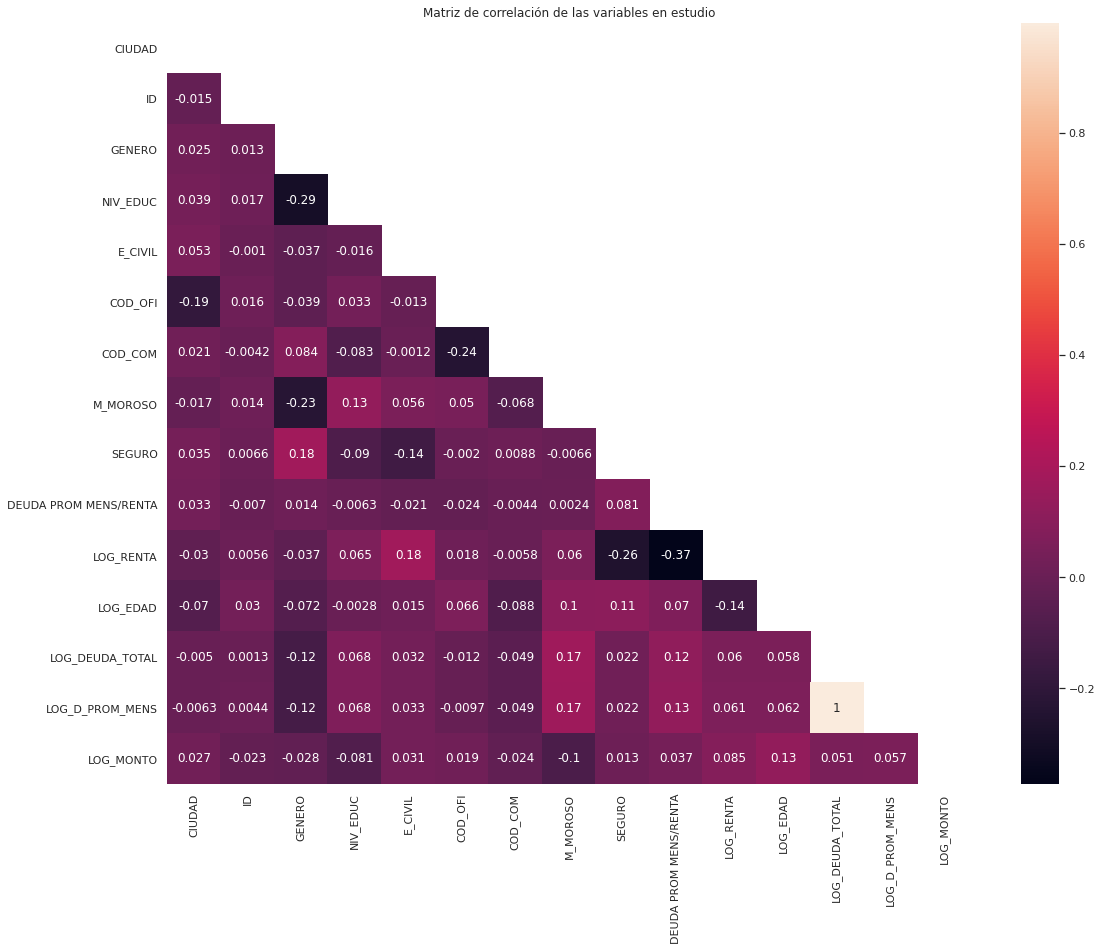

In [ ]:
# Definimos el tamaño de la matriz para visualización:
plt.figure(figsize=(18,14))

# computamos matriz de correlación
corr_matrix = basefuga3.corr()

# esto nos permite graficar sólo la parte superior o inferior de la matriz
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# matriz graficada
sns.heatmap(corr_matrix,mask=mask,annot=True).set(title="Matriz de correlación de las variables en estudio")

* A partir de lo que se observa en la matriz, dado que las variables 'LOG_D_PROM_MENS' y 'LOG_DEUDA_TOTAL' están altamente correlacionadas (1), se opta por dejar fuera esta última variable (LOG_DEUDA_TOTAL) y eliminarla, ya que la información que entrega es redundante y creemos que la primera variable resulta más fácil de interpretar.

Respecto al resto de las variables que no son categóricas o dummies, se observa que en general son bastante independientes unas con otras, es decir, no se ve que tengan mucha relación unas y otras.

* Se decide eliminar las variables 'ID', 'COD_OFI' y 'COD_COM' porque no  entregan información relevante.

* Se decide eliminar la variable 'DEUDA PROM MENS/RENTA' que se creó anteriormente, ya que observamos que no nos entrega información útil.

In [ ]:
# Se eliminan las columnas 'ID', 'COD_OFI' y 'COD_COM' por considerarse información irrelavante:
basefuga3.drop('ID', axis=1, inplace=True)
basefuga3.drop('COD_OFI', axis=1, inplace=True)
basefuga3.drop('COD_COM', axis=1, inplace=True)

# Se elimina la columna 'LOG_DEUDA_TOTAL' porque la información que entrega está contenida en la variable 'LOG_D_PROM_MENS'.
basefuga3.drop('LOG_DEUDA_TOTAL', axis=1, inplace=True)

# Se elimina la columna 'DEUDA PROM MENS/RENTA' por su muy baja varianza.
basefuga3.drop('DEUDA PROM MENS/RENTA', axis=1, inplace=True)

basefuga3.head()

,CIUDAD,FUGA,GENERO,NIV_EDUC,E_CIVIL,M_MOROSO,SEGURO,LOG_RENTA,LOG_EDAD,LOG_D_PROM_MENS,LOG_MONTO
0,0.445946,0,0.0,0.25,0.333333,0.666667,0.0,0.774730,0.357943,0.746889,0.500000
1,0.837838,0,1.0,0.25,1.000000,0.333333,1.0,0.390597,0.514302,0.138164,0.976723
2,0.027027,0,0.0,0.50,0.333333,0.333333,0.0,0.848428,0.357943,0.764991,1.000000
3,0.837838,0,1.0,1.00,0.333333,0.333333,0.0,0.760296,0.303314,0.689108,0.594628
4,0.837838,0,0.0,0.50,0.333333,0.333333,0.0,0.787882,0.440475,0.631366,0.919518


[Text(0.5, 1.0, 'Matriz de correlación de las variables en estudio')]

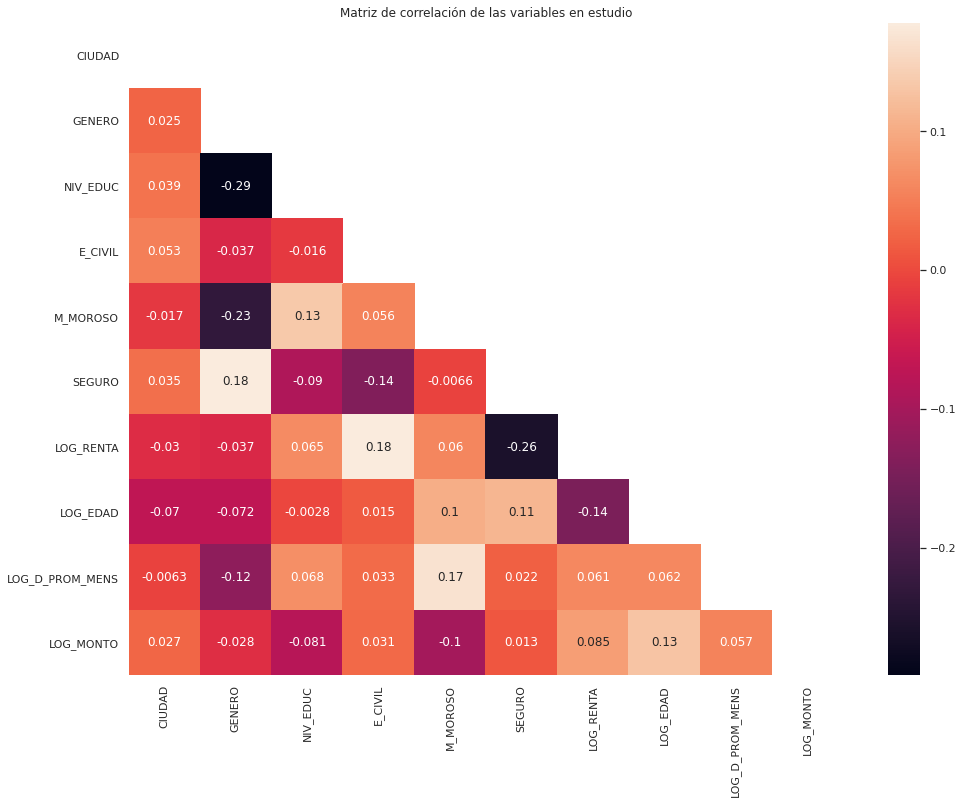

In [ ]:
# Definimos el tamaño de la matriz para visualización:
plt.figure(figsize=(16,12))

# computamos matriz de correlación
corr_matrix = basefuga3.corr()

# esto nos permite graficar sólo la parte superior o inferior de la matriz
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# matriz graficada
sns.heatmap(corr_matrix,mask=mask,annot=True).set(title="Matriz de correlación de las variables en estudio")

* Volvemos a graficar con las variables con las que trabajaremos. 

*****Ojo que aquí solo deberían aparecer variables que no son categóricas, como: LOG_MONTO, LOG_D_PROM_MENS, LOG_EDAD, LOG RENTA.

### **5.3 Test Chi-square**

In [ ]:
#TEST N°1 - VARIABLE 'NIV_EDUC':

# Definimos número de particiones para variable numérica
bins = 3
# Construimos la tabla de contingencia con la variable 'NIV_EDUC':
variable = 'NIV_EDUC'
c_table = pd.concat([basefuga3['FUGA'],pd.cut(basefuga3[variable], bins=bins)]
                    ,axis=1).groupby([variable,'FUGA']).size().unstack('FUGA')
c_table

FUGA,0,1
NIV_EDUC,,
"(-0.001, 0.333]",361,265
"(0.333, 0.667]",568,141
"(0.667, 1.0]",228,731


In [ ]:
from scipy.stats import chi2_contingency 

# aplicamos el test
stat, p_val, dof, expected = chi2_contingency(c_table) 
  
# interpretamos el p-value 
alpha = 0.05
print(f"p-value = {round(p_val,4)} | estadístico: {round(stat,3)}") 
if p_val < alpha:
    print('Las variables son dependientes (Rechaza Hipótesis Nula)  | Existe relación entre las variables') 
else: 
    print('Las variables son independientes (Acepta Hipótesis Nula) | No existe relación entre las variables') 

p-value = 0.0 | estadístico: 535.578
Las variables son dependientes (Rechaza Hipótesis Nula)  | Existe relación entre las variables


El test de chi cuadrado indica que la variable `NIV_EDUC` (Nivel Educacional) nos sirve para el problema de predicción. 

In [ ]:
#TEST N°2 - VARIABLE 'E_CIVIL':

# Definimos número de particiones para variable numérica
bins = 4
# Construimos la tabla de contingencia con la variable 'E_CIVIL':
variable = 'E_CIVIL'
c_table = pd.concat([basefuga3['FUGA'],pd.cut(basefuga3[variable], bins=bins)],axis=1).groupby([variable,'FUGA']).size().unstack('FUGA')
c_table

FUGA,0,1
E_CIVIL,,
"(-0.001, 0.25]",442,200
"(0.25, 0.5]",577,863
"(0.5, 0.75]",53,61
"(0.75, 1.0]",85,13


In [ ]:
from scipy.stats import chi2_contingency 

# aplicamos el test
stat, p_val, dof, expected = chi2_contingency(c_table) 
  
# interpretamos el p-value 
alpha = 0.05
print(f"p-value = {round(p_val,4)} | estadístico: {round(stat,3)}") 
if p_val < alpha:
    print('Las variables son dependientes (Rechaza Hipótesis Nula)  | Existe relación entre las variables') 
else: 
    print('Las variables son independientes (Acepta Hipótesis Nula) | No existe relación entre las variables') 

p-value = 0.0 | estadístico: 201.324
Las variables son dependientes (Rechaza Hipótesis Nula)  | Existe relación entre las variables


El test de chi cuadrado indica que la variable `E_CIVIL` (Estado Civil) nos sirve para el problema de predicción. 

In [ ]:
#TEST N°3 - VARIABLE 'GENERO':

# Definimos número de particiones para variable numérica
bins = 2
# Construimos la tabla de contingencia con la variable 'GENERO':
variable = 'GENERO'
c_table = pd.concat([basefuga3['FUGA'],pd.cut(basefuga3[variable], bins=bins)],axis=1).groupby([variable,'FUGA']).size().unstack('FUGA')
c_table

FUGA,0,1
GENERO,,
"(-0.001, 0.5]",438,958
"(0.5, 1.0]",719,179


In [ ]:
from scipy.stats import chi2_contingency 

# aplicamos el test
stat, p_val, dof, expected = chi2_contingency(c_table) 
  
# interpretamos el p-value 
alpha = 0.05
print(f"p-value = {round(p_val,4)} | estadístico: {round(stat,3)}") 
if p_val < alpha:
    print('Las variables son dependientes (Rechaza Hipótesis Nula)  | Existe relación entre las variables') 
else: 
    print('Las variables son independientes (Acepta Hipótesis Nula) | No existe relación entre las variables') 

p-value = 0.0 | estadístico: 516.337
Las variables son dependientes (Rechaza Hipótesis Nula)  | Existe relación entre las variables


El test de chi cuadrado indica que la variable `GENERO` (Género) nos sirve para el problema de predicción. 

### **5.4 Test Kolmogorov-Smirnov**

#### 5.4.1 Preámbulo Kolmogorov-Smirnov

In [ ]:
def ecdf(basefuga3):
    # Computa la distribución empírica acumulada (ECDF por sus siglas en inglés)
    x = np.sort(basefuga3)
    n = x.size
    y = np.arange(1, n+1) / n
    return x,y

def plot_kolmogorov(sample1, sample2,variable_name='',alpha=0.05):
  import matplotlib.pyplot as plt
  from scipy import stats
  # Obtenemos la ECDF para cada muestra y las ordenamos
  x1,y1 = ecdf(sample1)
  x2,y2 = ecdf(sample2)
  # Gráfico
  plt.figure(figsize=(9, 6))
  sns.lineplot(x=x1, y=y1, color='red')
  sns.lineplot(x=x2, y=y2, color='blue')
  # Test KS
  stat, p_val = stats.ks_2samp(sample1, sample2)
  # interpretamos el p-value 
  print(f"p-value: {round(p_val,4)} | alpha: {alpha}") 
  if p_val < alpha: 
      print('Las distribuciones son independientes (Rechaza Hipótesis Nula) | Existe relación entre las variables') 
  else: 
      print('Las distribuciones son dependientes (Acepta Hipótesis Nula) | No existe relación entre las variables') 
  plt.ylabel("Cumulative Distribution Function")
  plt.xlabel(variable_name)
  plt.show()

In [ ]:
# random samples
arr1 = np.random.normal(35, 5, size=300) # 
arr2 = np.random.normal(28, 5, size=300) # 
print(f"MEAN 1: {round(np.mean(arr1),3)} | STD 1: {round(np.std(arr1),3)}")
print(f"MEAN 2: {round(np.mean(arr2),3)} | STD 2: {round(np.std(arr2),3)}")

MEAN 1: 35.03 | STD 1: 4.967
MEAN 2: 28.05 | STD 2: 5.267


p-value: 0.0 | alpha: 0.05
Las distribuciones son independientes (Rechaza Hipótesis Nula) | Existe relación entre las variables


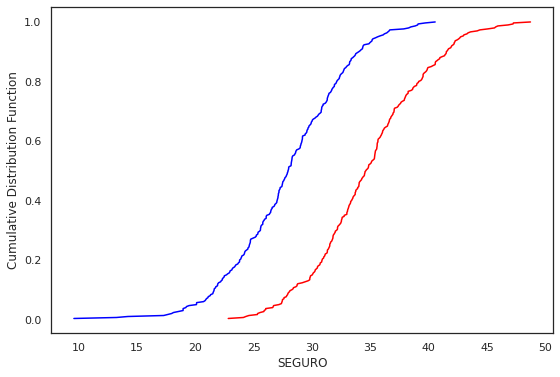

In [ ]:
# aplicamos el test y graficamos
plot_kolmogorov(arr1, arr2,'SEGURO')

* Se puede apreciar que, e

#### 5.4.2 Aplicamos Kolmogorov-Smirnov

In [ ]:
basefuga3

,CIUDAD,FUGA,GENERO,NIV_EDUC,E_CIVIL,M_MOROSO,SEGURO,LOG_RENTA,LOG_EDAD,LOG_D_PROM_MENS,LOG_MONTO
0,0.445946,0,0.0,0.25,0.333333,0.666667,0.0,0.774730,0.357943,0.746889,0.500000
1,0.837838,0,1.0,0.25,1.000000,0.333333,1.0,0.390597,0.514302,0.138164,0.976723
2,0.027027,0,0.0,0.50,0.333333,0.333333,0.0,0.848428,0.357943,0.764991,1.000000
3,0.837838,0,1.0,1.00,0.333333,0.333333,0.0,0.760296,0.303314,0.689108,0.594628
4,0.837838,0,0.0,0.50,0.333333,0.333333,0.0,0.787882,0.440475,0.631366,0.919518
...,...,...,...,...,...,...,...,...,...,...,...
2289,0.837838,0,1.0,0.50,0.000000,1.000000,1.0,0.654798,0.424728,0.766774,0.284376
2290,0.175676,1,0.0,0.50,0.000000,0.333333,0.0,0.555492,0.581087,0.811594,0.461999
2291,0.040541,1,0.0,1.00,0.000000,0.333333,0.0,0.772133,0.541785,0.774534,0.767597
2292,0.837838,1,0.0,1.00,0.333333,0.666667,0.0,0.931344,0.408619,0.768276,0.800408


In [ ]:
# Ocupamos otra variable para aplicar el test, que corresponde a 'LOG_RENTA'
variable = 'LOG_RENTA'
plot_kolmogorov(basefuga3[basefuga3['FUGA']==1][variable].values,[basefuga3['FUGA']==0][variable].values, variable)

TypeError: ignored

p-value: 0.0 | alpha: 0.05
Las distribuciones son independientes (Rechaza Hipótesis Nula) | Existe relación entre las variables


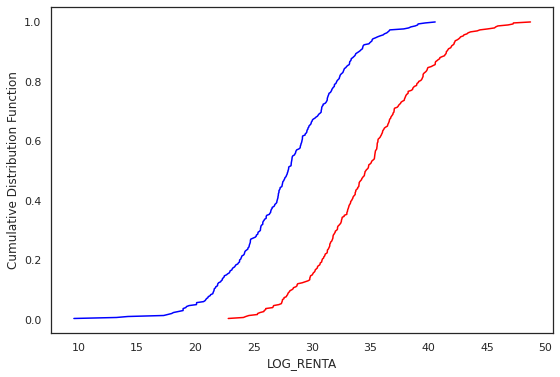

In [ ]:
# aplicamos el test y graficamos
plot_kolmogorov(arr1, arr2,'LOG_RENTA')

ValueError: ignored

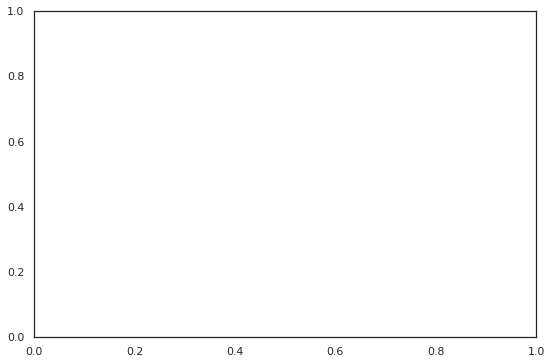

In [ ]:
# Ocupamos otra variable para aplicar el test, que corresponde a 'NIV_EDUC'
variable = 'NIV_EDUC'
plot_kolmogorov(basefuga3[basefuga3['FUGA']==1][variable].values, basefuga3[basefuga3['FUGA']==0][variable].values, variable)

p-value: 0.0 | alpha: 0.05
Las distribuciones son independientes (Rechaza Hipótesis Nula) | Existe relación entre las variables


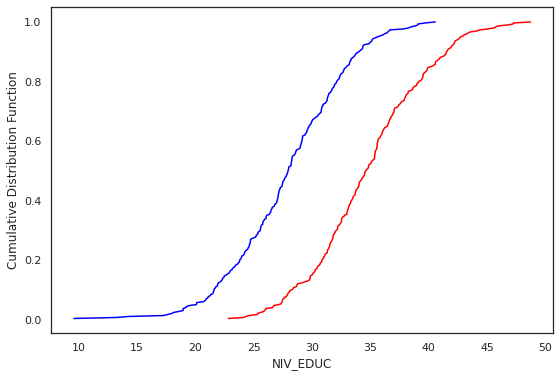

In [ ]:
# aplicamos el test y graficamos
plot_kolmogorov(arr1, arr2,'NIV_EDUC')

*** Explicar qué se observa al aplicar el test a esas variables.

p-value: 0.0 | alpha: 0.05
Las distribuciones son independientes (Rechaza Hipótesis Nula) | Existe relación entre las variables


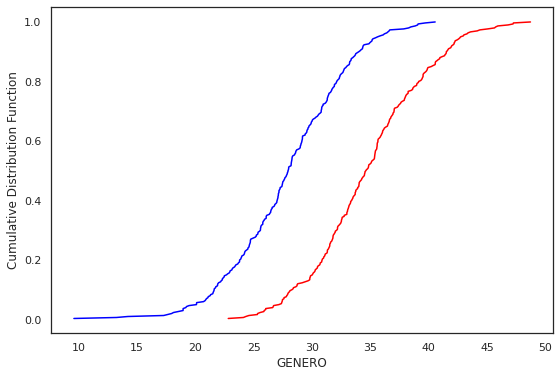

In [ ]:
# aplicamos el test y graficamos
plot_kolmogorov(arr1, arr2,'GENERO')

ValueError: ignored

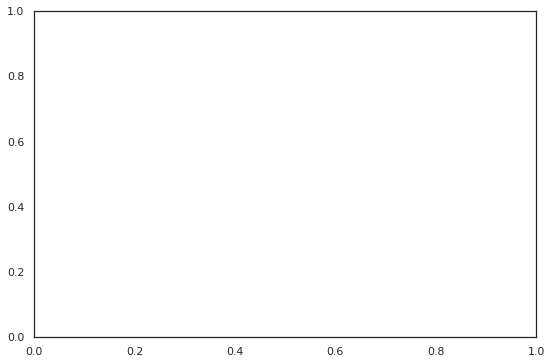

In [ ]:
# Ocupamos otra variable para aplicar el test, que corresponde a 'NIV_EDUC'
variable = 'GENERO'
plot_kolmogorov(basefuga3[basefuga3['FUGA']==1][variable].values, basefuga3[basefuga3['FUGA']==0][variable].values, variable)

# **Resultados de la Parte I. Preprocesamiento de los Datos:**

A partir del preprocesamiento de los datos se ha decidido descartar los siguientes atributos originales: 'ID', 'COD_COM' y 'COD_OFI' por no aportar información que sirviera para el análisis.

A su vez, dejamos fuera los atributos: 'D_Marzo', 'D_Abril', 'D_Mayo', 'D_Junio', 'D_Julio', 'D_Agosto' y 'D_Septiembre' porque creamos dos variables que utilizan los datos de todas las anteriores (DEUDA_TOTAL y D_PROM_MENS), y una tercera que se creó a partir de la deuda promedio mensual y la renta (DEUDA PROM MENS/RENTA). Esta última finalmente también se eliminó, luego de comprobar que no aportaba nueva información para el análisis.

Por tanto, luego de imputar los valores perdidos, eliminar outliers, escalar los valores y aplicar distintos filtros, nuestro dataset final preprocesado es el siguiente:

***

In [ ]:
basefuga3.isna().sum()

CIUDAD             0
FUGA               0
GENERO             0
NIV_EDUC           0
E_CIVIL            0
M_MOROSO           0
SEGURO             0
LOG_RENTA          0
LOG_EDAD           0
LOG_D_PROM_MENS    0
LOG_MONTO          0
dtype: int64

In [ ]:
basefuga3=basefuga3.dropna(subset=['LOG_EDAD'])
basefuga3.isna().sum()

CIUDAD             0
FUGA               0
GENERO             0
NIV_EDUC           0
E_CIVIL            0
M_MOROSO           0
SEGURO             0
LOG_RENTA          0
LOG_EDAD           0
LOG_D_PROM_MENS    0
LOG_MONTO          0
dtype: int64

#**6. División del dataset**

In [ ]:
# Importando de la librería SKLEARN:
from sklearn.model_selection import train_test_split

# Separación del conjunto de datos:
X_train, X_test, y_train, y_test = train_test_split(basefuga3[basefuga3.columns.difference(['FUGA'])], basefuga3['FUGA'], test_size=0.2, random_state=101) # Se deja un 20% de los datos para testear.

* Se definió dividir el dataset en un conjunto de entrenamiento y un conjunto de testeo, donde el 80% de los datos será para entrenamiento y el 20% restante se ocupará para testeo, donde se validará la efectividad del modelo.

In [ ]:
# Tamaño del conjunto de datos de entrenamiento:
print("Tamaño del conjunto de entrenamiento y número de atributos:", X_train.shape) # 1835 observaciones (filas) en 10 columnas

Tamaño del conjunto de entrenamiento y número de atributos: (1835, 10)


In [ ]:
# Tamaño del conjunto de datos de testeo:
print("Tamaño del conjunto de testeo y número de atributos:", X_test.shape) # 459 observaciones (filas) en 10 columnaso

Tamaño del conjunto de testeo y número de atributos: (459, 10)


## 6.1 Revisión Balanceo de Clases:

In [ ]:
#Revisión del balanceo de clases (FUGA y NO FUGA)
print(f"Balance de datos en conjunto de entrenamiento: {Counter(y_train)}")
print(f"Balance de datos en conjunto testeo: {Counter(y_test)}")

Balance de datos en conjunto de entrenamiento: Counter({'1': 919, '0': 916})
Balance de datos en conjunto testeo: Counter({'0': 241, '1': 218})


* En el conjunto de entrenamiento tenemos 919 observaciones en la etiqueta FUGA (1) y 916 observaciones en la etiqueta NO FUGA (0).

* En el conjunto de testeo tenemos 241 observaciones en la etiqueta FUGA (1) y 218 observaciones en la etiqueta NO FUGA (2).



---



# **7. Entrenamiento y Testeo de Modelos de Clasificación**

## **7.1 KNN**

En `KNN` el principal hiperparámetro es el número de vecinos en torno a una observación para la clasificación. Existen otros parámetros que ajustar, como la métrica de distancia entre las observaciones, la ponderación de relevancia de los atributos, entre otros. Por simplicidad, sólo ajustaremos al parámetro `n_neighbors`.

In [ ]:
basefuga3

,CIUDAD,FUGA,GENERO,NIV_EDUC,E_CIVIL,M_MOROSO,SEGURO,LOG_RENTA,LOG_EDAD,LOG_D_PROM_MENS,LOG_MONTO
0,0.445946,0,0.0,0.25,0.333333,0.666667,0.0,0.774730,0.357943,0.746889,0.500000
1,0.837838,0,1.0,0.25,1.000000,0.333333,1.0,0.390597,0.514302,0.138164,0.976723
2,0.027027,0,0.0,0.50,0.333333,0.333333,0.0,0.848428,0.357943,0.764991,1.000000
3,0.837838,0,1.0,1.00,0.333333,0.333333,0.0,0.760296,0.303314,0.689108,0.594628
4,0.837838,0,0.0,0.50,0.333333,0.333333,0.0,0.787882,0.440475,0.631366,0.919518
...,...,...,...,...,...,...,...,...,...,...,...
2289,0.837838,0,1.0,0.50,0.000000,1.000000,1.0,0.654798,0.424728,0.766774,0.284376
2290,0.175676,1,0.0,0.50,0.000000,0.333333,0.0,0.555492,0.581087,0.811594,0.461999
2291,0.040541,1,0.0,1.00,0.000000,0.333333,0.0,0.772133,0.541785,0.774534,0.767597
2292,0.837838,1,0.0,1.00,0.333333,0.666667,0.0,0.931344,0.408619,0.768276,0.800408


In [ ]:
# Importando de la librería SKLEARN, el modelo de clasificación KNN:
from sklearn.neighbors import KNeighborsClassifier
# Número de vecinos que se tomarán para entrenar: 11
knn = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)

In [ ]:
X_test.iloc[0,:].T # Etiqueta real de una de las observaciones de "basefuga3".

CIUDAD             0.837838
E_CIVIL            0.000000
GENERO             0.000000
LOG_D_PROM_MENS    0.719122
LOG_EDAD           0.593713
LOG_MONTO          0.517597
LOG_RENTA          0.749522
M_MOROSO           0.333333
NIV_EDUC           1.000000
SEGURO             1.000000
Name: 508, dtype: float64

In [ ]:
# Se definió a una de las observaciones de "basefuga3" como 'obs1' para compararla con lo que prediga el modelo.
obs1 = pd.DataFrame(X_test.iloc[0,:]).T
obs1 # Se contrasta predicción de knn con etiqueta real: basefuga3.iloc[0,:]

,CIUDAD,E_CIVIL,GENERO,LOG_D_PROM_MENS,LOG_EDAD,LOG_MONTO,LOG_RENTA,M_MOROSO,NIV_EDUC,SEGURO
508,0.837838,0.0,0.0,0.719122,0.593713,0.517597,0.749522,0.333333,1.0,1.0


In [ ]:
basefuga3.iloc[984:986,:]

,CIUDAD,FUGA,GENERO,NIV_EDUC,E_CIVIL,M_MOROSO,SEGURO,LOG_RENTA,LOG_EDAD,LOG_D_PROM_MENS,LOG_MONTO
984,0.959459,0,0.0,0.25,0.333333,0.333333,0.0,0.605340,0.375245,0.759834,0.691384
985,0.027027,0,1.0,0.50,1.000000,0.333333,0.0,0.915438,0.303314,0.588591,0.419518


In [ ]:
pd.DataFrame(basefuga3.iloc[0,:]).T

,CIUDAD,FUGA,GENERO,NIV_EDUC,E_CIVIL,M_MOROSO,SEGURO,LOG_RENTA,LOG_EDAD,LOG_D_PROM_MENS,LOG_MONTO
0,0.445946,0,0,0.25,0.333333,0.666667,0,0.77473,0.357943,0.746889,0.5


In [ ]:
# Se utiliza "predict" como método para generar predicciones a partir de un modelo entrenado:
knn.predict(obs1)

array(['1'], dtype=object)

Con `KNN` el modelo predijo que la persona se FUGA y efectivamente eso no ocurrió.

###**Métricas de desempeño: Accuracy, Precision y Recall para KNN**

In [ ]:
# Obtener accuracy (acierto global):
#from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, accuracy_score
print(f"Accuracy entretamiento: {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Accuracy testeo : {accuracy_score(y_test, knn.predict(X_test))}")
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
#print(f"Precision entretamiento: {precision_score(y_train, knn.predict(X_train))}")
#print(f"Precision testeo : {precision_socre(y_test, knn.predict(X_test))}")

#print(f"Recall entretamiento: {recall_score(y_train, knn.predict(X_train))}")
#print(f"Recall testeo : {recall_score(y_test, knn.predict(X_test))}")

Accuracy entretamiento: 0.8839237057220708
Accuracy testeo : 0.8257080610021786
0.8257080610021786


* KNN:
> De todas las observaciones que predijo, acertó un 88% en entrenamiento.

  > De todas las observaciones que predijo, acertó un 83% en testeo.




In [ ]:
# Entrenamiento para diferentes números de vecinos:
accuracies = []
neighbors = list(range(3,21,2)) # se define rango de vecinos (impar) que parte en 3, termina en 21 y va de 2 en 2. A mayor número de vecinos, disminuye la capacidad predictiva del modelo.
for n_neighbor in neighbors: #se definió que para cada número de vecinos de la lista se entrenará.
  # Entrenamiento con KNN:
  knn = KNeighborsClassifier(n_neighbors=n_neighbor).fit(X_train, y_train)
  # Predecir y guardar accuracy:
  accuracies.append(accuracy_score(y_train, knn.predict(X_train)))

Text(0, 0.5, 'Accuracy')

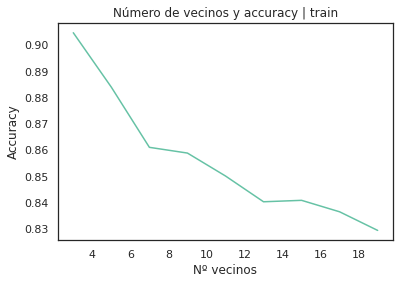

In [ ]:
# Gráfico de entrenamiento, por número de vecinos y accuracy:
plt.plot(neighbors,accuracies)
plt.title('Número de vecinos y accuracy | train')
plt.xlabel('Nº vecinos')
plt.ylabel('Accuracy')

* El número óptimo de vecinos para el entrenamiento es entre 3 y 5.

###**Precision KNN**

In [ ]:
plt.plot(neighbors,recall)
plt.title('Número de vecinos y accuracy | train')
plt.xlabel('Nº vecinos')
plt.ylabel('Accuracy')

NameError: ignored

###**Recall KNN**

Del gráfico se observa que decrece el 'Accuracy' de `KNN` a medida que aumenta el número de vecinos. De manera general aplicando KNN con un número muy grande de vecinos se vuelve menos predicitivo, ya que abarca mayor cantidad de observaciones que no necesariamente se encuentran cerca o pertenecen a la misma clase.
Con muy pocas observaciones, puede ser poco representativo, pero con muchas observaciones (una muestra muy grande) se están tomando observaciones que quizás tienen poca relación unas con otras. Sin embargo, se observa también que, entre el valor con mayor accuracy y el menor accuracy hay solamente 8 puntos (0.83 a 0.91), por lo que la visualización puede mostrar de manera errónea un desempeño peor que el real.

## **7.2 Regresión Logística (LOGIT)**

In [ ]:
# Importando de la librería SKLEARN el modelo de "Regresión logística":
from sklearn.linear_model import LogisticRegression
# Entrenamiento con "Logit"
logit = LogisticRegression(random_state=0).fit(X_train, y_train)
# Accuracy
print(f"Accuracy train: {accuracy_score(y_train, logit.predict(X_train))}")
print(f"Accuracy test : {accuracy_score(y_test, logit.predict(X_test))}")


Accuracy train: 0.784741144414169
Accuracy test : 0.7668845315904139


Con el modelo de `Regresión Logística` el acierto global (accuracy) de entrenamiento es de 0.78 y de testeo es de 0.76.

La diferencia entre el accuracy de entrenamiento y testeo es de 2 puntos, lo que no es un mal desempeño para el modelo de regresión logística que busca predecir la probabilidad de que un cliente se fugue o no se fugue. 

El modelo es útil, pero no sabemos si es el mejor modelo predictivo hasta el momento.

## HOLA REVISE, LA COLUMNA FUGA NO PUEDE SER OBJET, SALUDOS EFC

In [ ]:
basefuga3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2294 entries, 0 to 2293
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CIUDAD           2294 non-null   float64
 1   FUGA             2294 non-null   object 
 2   GENERO           2294 non-null   float64
 3   NIV_EDUC         2294 non-null   float64
 4   E_CIVIL          2294 non-null   float64
 5   M_MOROSO         2294 non-null   float64
 6   SEGURO           2294 non-null   float64
 7   LOG_RENTA        2294 non-null   float64
 8   LOG_EDAD         2294 non-null   float64
 9   LOG_D_PROM_MENS  2294 non-null   float64
 10  LOG_MONTO        2294 non-null   float64
dtypes: float64(10), object(1)
memory usage: 215.1+ KB


In [ ]:
basefuga3['FUGA']

0       0
1       0
2       0
3       0
4       0
       ..
2289    0
2290    1
2291    1
2292    1
2293    1
Name: FUGA, Length: 2294, dtype: object

In [ ]:
#NO ESTA TRANSFORMANDO
basefuga3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2294 entries, 0 to 2293
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CIUDAD           2294 non-null   float64
 1   FUGA             2294 non-null   object 
 2   GENERO           2294 non-null   float64
 3   NIV_EDUC         2294 non-null   float64
 4   E_CIVIL          2294 non-null   float64
 5   M_MOROSO         2294 non-null   float64
 6   SEGURO           2294 non-null   float64
 7   LOG_RENTA        2294 non-null   float64
 8   LOG_EDAD         2294 non-null   float64
 9   LOG_D_PROM_MENS  2294 non-null   float64
 10  LOG_MONTO        2294 non-null   float64
dtypes: float64(10), object(1)
memory usage: 215.1+ KB


In [ ]:
# Coeficientes
#basefuga3({"Atributo":X_test.columns.tolist(),"Coeficientes":logit.coef_.tolist()[0]})

In [ ]:
# Coeficientes
#basefuga3({"Atributo":X_test.columns.tolist(),"Coeficientes":logit.coef_.tolist()[0]})

En el modelo de `Regresion Logística (logit)` los coeficientes son los parámetros o estimadores que el modelo ajustó, de forma que los valores resultantes son aquellos que lograrían predecir de mejor manera la `probabilidad de fuga` o la `probabilidad de no fuga`.

Preliminarmente, se puede observar que los atributos que presentan coeficientes estadísticamente significativos son: `AGE, DEBT_INCOME, LOG_CREDIT_DEBT y LOG_YRS_WORK`.**********

## **7.3 Árbol de decisión**

In [ ]:
# Importando desde la librería SKLEARN el modelo de "Árbol de decisión":
from sklearn.tree import DecisionTreeClassifier
# Entrenamiento con "TREE"
TREE = DecisionTreeClassifier(random_state=0, max_depth = 2).fit(X_train,y_train) # Modelo con 2 ramificaciones.
# Accuracy
print(f"Accuracy train: {accuracy_score(y_train, TREE.predict(X_train))}")
print(f"Accuracy test : {accuracy_score(y_test, TREE.predict(X_test))}")

Accuracy train: 0.8267029972752044
Accuracy test : 0.8431372549019608


In [ ]:
# Importando desde la librería SKLEARN el modelo de "Árbol de decisión":
from sklearn.tree import DecisionTreeClassifier
# Entrenamiento con "TREE"
TREE = DecisionTreeClassifier(random_state=0, max_depth = 3).fit(X_train,y_train) # Modelo con 3 ramificaciones.
# Accuracy
print(f"Accuracy train: {accuracy_score(y_train, TREE.predict(X_train))}")
print(f"Accuracy test : {accuracy_score(y_test, TREE.predict(X_test))}")

Accuracy train: 0.8555858310626703
Accuracy test : 0.8823529411764706


In [ ]:
# Importando desde la librería SKLEARN el modelo de "Árbol de decisión":
from sklearn.tree import DecisionTreeClassifier
# Entrenamiento con "TREE"
TREE = DecisionTreeClassifier(random_state=0, max_depth = 4).fit(X_train,y_train) # Modelo con 4 ramificaciones.
# Accuracy
print(f"Accuracy train: {accuracy_score(y_train, TREE.predict(X_train))}")
print(f"Accuracy test : {accuracy_score(y_test, TREE.predict(X_test))}")

Accuracy train: 0.8752043596730246
Accuracy test : 0.8932461873638344


Del modelo de `Árbol de decisión`, se observa que:
* El árbol con 2 ramificaciones obtiene un accuracy de entrenamiento de 0.826 y de 0.843 en testeo.

* El árbol con 3 ramificaciones se ve cómo mejora el accuracy de entrenamiento a 0.855 y el de testeo a 0.882.

* El árbol con 4 ramificaciones mejora nuevamente el accuracy de entrenamiento a 0.875 y el de testeo a 0.893.

[Text(660.1339285714286, 489.24, 'GENERO <= 0.197\ngini = 0.5\nsamples = 1835\nvalue = [916, 919]\nclass = 1'),
 Text(323.8392857142857, 380.52000000000004, 'LOG_EDAD <= 0.367\ngini = 0.426\nsamples = 1106\nvalue = [340, 766]\nclass = 1'),
 Text(199.28571428571428, 271.8, 'LOG_EDAD <= 0.168\ngini = 0.313\nsamples = 232\nvalue = [187, 45]\nclass = 0'),
 Text(99.64285714285714, 163.08000000000004, 'M_MOROSO <= 0.167\ngini = 0.5\nsamples = 51\nvalue = [26, 25]\nclass = 0'),
 Text(49.82142857142857, 54.360000000000014, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = 0'),
 Text(149.46428571428572, 54.360000000000014, 'gini = 0.487\nsamples = 43\nvalue = [18, 25]\nclass = 1'),
 Text(298.92857142857144, 163.08000000000004, 'LOG_RENTA <= 0.883\ngini = 0.197\nsamples = 181\nvalue = [161, 20]\nclass = 0'),
 Text(249.10714285714283, 54.360000000000014, 'gini = 0.138\nsamples = 174\nvalue = [161, 13]\nclass = 0'),
 Text(348.75, 54.360000000000014, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass 

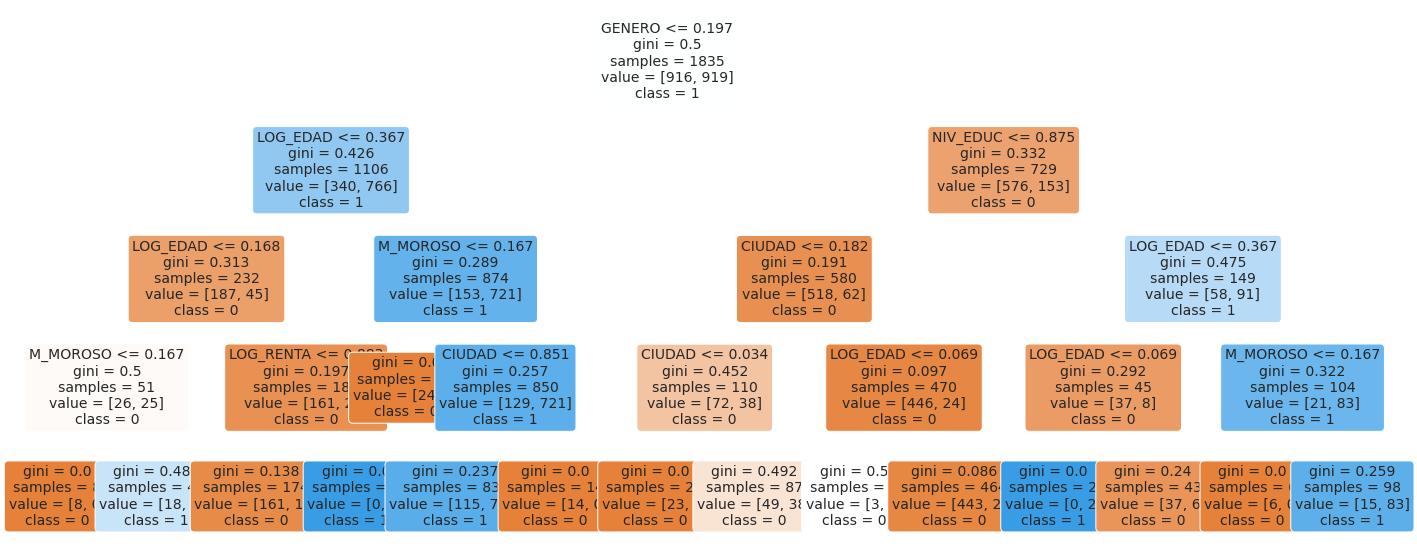

In [ ]:
# Gráfico de árbol de decisión con 4 ramificaciones:
from sklearn import tree
plt.figure(figsize=(25,10))
tree.plot_tree(TREE,feature_names = X_test.columns, class_names = list(set(y_test)),
               filled = True, rounded=True, fontsize=14)

Como se observa en el gráfico, el modelo determinó que el atributo más relevate es `'GENERO'` (Género del cliente), luego `NIV_EDUC` (nivel educacional) y luego `LOG_EDAD` (edad transformada a logaritmo).

In [ ]:
# Entrenamiento para distinto número de ramificaciones:
accuracies = []
depths = list(range(2,30))
for depth in depths:
  # Entrenamiento con TREE
  TREE = DecisionTreeClassifier(random_state=0, max_depth = depth).fit(X_train,y_train)
  # Predicción y guardar accuracy
  accuracies.append(accuracy_score(y_train, TREE.predict(X_train)))

Text(0, 0.5, 'Accuracy')

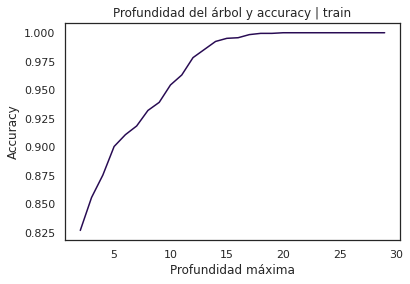

In [ ]:
# Gráfico que muestra accuracy del modelo de árbol, con hasta 30 ramificaciones:
plt.plot(depths,accuracies)
plt.title('Profundidad del árbol y accuracy | train')
plt.xlabel('Profundidad máxima')
plt.ylabel('Accuracy')

Se puede interpretar del gráfico que: 
* A mayor cantidad de ramificaciones del "árbol" el accuracy se acerca más a "1". 
* Alrededor de la ramificación N°15 el modelo comienza a sobreajustarse.

## **7.4 CROSS VALIDATION**

In [ ]:
# Importando desde librería SKLEARN la función de validación cruzada y selección de modelos: :
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
# Métricas de desempeño (Recall - Precision - Accuracy):
from sklearn.metrics import recall_score, precision_score, accuracy_score

In [ ]:
# Diccionario con modelos a evaluar: LOGIT - KNN - TREE
models = {"LOGIT":LogisticRegression(random_state=0),"KNN":KNeighborsClassifier(n_neighbors=9),
          "TREE":DecisionTreeClassifier(random_state=0, max_depth = 4)} # se estableció para KNN un número de 9 vecinos y para el "Árbol" una profundidad de 4 ramificaciones.
entries = []
# Iteramos sobre los modelos, entrenamos y evaluamos:
for name,model in models.items():
  print(f"Train {name}")
  Accuracies = cross_val_score(model, X_train, y_train, scoring ='accuracy', cv=10, n_jobs = -1) # establecimos 10 iteraciones para el entrenamiento de cada modelo
  for fold_idx, accuracy in enumerate(Accuracies):
      entries.append((name, fold_idx, accuracy))
      cv_results = pd.DataFrame(entries, columns=['Modelo', 'Iteración', 'Accuracy'])

Train LOGIT
Train KNN
Train TREE


In [ ]:
# Como resultado de la validación cruzada tenemos un dataframe con la información del accuracy del modelo en cada "carpeta" del conjunto de entrenamiento
cv_results.head(30)

,Modelo,Iteración,Accuracy
0,LOGIT,0,0.755435
1,LOGIT,1,0.782609
2,LOGIT,2,0.777174
3,LOGIT,3,0.788043
4,LOGIT,4,0.798913
5,LOGIT,5,0.814208
6,LOGIT,6,0.819672
7,LOGIT,7,0.754098
8,LOGIT,8,0.748634
9,LOGIT,9,0.781421


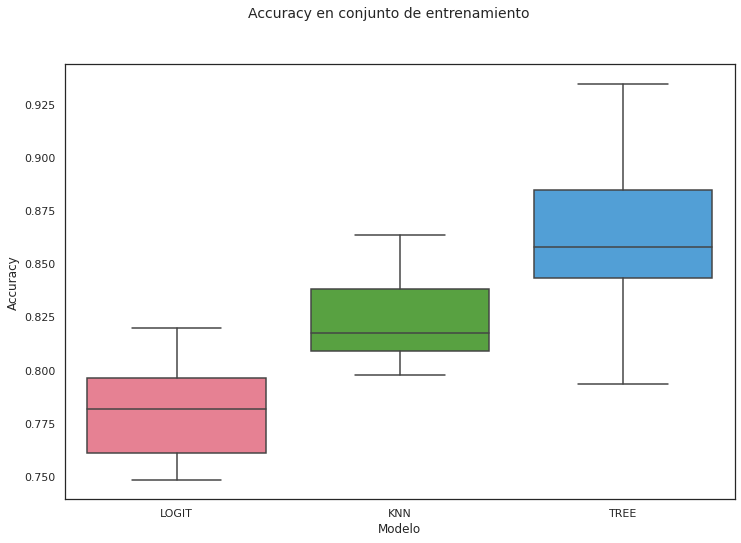

In [ ]:
# Gráfico de resultados de cada modelo en un box plot:    
plt.figure(figsize=(12, 8))
plt.suptitle("Accuracy en conjunto de entrenamiento", fontsize=14)
sns.boxplot(x='Modelo', y='Accuracy', data=cv_results, palette='husl')

Interpretando el Gráfico de Resultados de los 3 modelos entrenados `(LOGIT, KNN y TREE)`, tenemos que:
* El `Árbol de decisión (TREE)` es aquel que obtuvo mejor desempeño general en el conjunto de entrenamiento.
* Luego, sigue el modelo `KNN` con un desempeño inferior pero con resultados con menor dispersión. 
* Finalmente, `LOGIT` obtuvo un peor desempeño que los anteriores, con un accuracy por debajo de los 0.800 puntos.

#**DESBALANCE DE CLASES**

* Al analizar la base de datos inicial, observamos que ambas clases (FUGA y NO FUGA) se encontraban bien balanceadas. En el conjunto de datos original 11XX observaciones tienen la etiqueta FUGA (1) y 11XX observaciones están etiquetadas con NO FUGA (0). Dado lo anterior, para el conjunto de datos completo no tuvimos la necesidad de aplicar ninguna técnica para balancear las clases, por lo que seguiremos con la evaluación en test.



# **8. EVALUACIÓN EN TEST**

In [ ]:
# Importando de la librería SKLEARN el reporte de clasificación y la matriz de confusión:
from sklearn.metrics import classification_report, confusion_matrix
model = knn
y_pred = model.predict(X_test) # predicción sobre atributos y etiquetas del testeo.
print(classification_report(y_test, y_pred, target_names=list(set(y_train))))

# Macro avg: promedio simple de la medida. Ej macr_avg (0.79, 0.81) = 0.8
# Weighted avg: promedia las medidas ponderadas por el soporte de cada clase

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       241
           1       0.76      0.93      0.84       218

    accuracy                           0.83       459
   macro avg       0.84      0.83      0.83       459
weighted avg       0.85      0.83      0.83       459



Según el reporte de clasificación:

* El `Accuracy en testeo para KNN es de 0.83`.

* No se presenta problemas de desbalance de ambas clases (0= NO FUGA y 1= FUGA), el nivel de precisión de la predicción en testeo es superior que para la clase "0" (NO FUGA).
* El recall
* El f1-score 
* El support indica

In [ ]:
# Precision

* Para el `conjunto de testeo con KNN`: El modelo predice cercano al 87,7% de los clientes que NO caerán en DEFAULT, baásicamente los clientes confiables. Respecto al 12,23% restante que el modelo no pudo predecir correctamente, estos serán un costo asociado a la elección del cliente. Respecto a los clientes que caen en DEFAULT, el modelo predice un 42,57% de los clientes que SI caerán en DEFAULT. También, existe un error cercano al 57,43% de los casos que el modelo no pudo predecir, y esto puede significar un alto costo para el banco, ya que aceptaría clientes sin la certeza de su condición financiera.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
model = logit
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=list(set(y_train))))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       241
           1       0.74      0.79      0.76       218

    accuracy                           0.77       459
   macro avg       0.77      0.77      0.77       459
weighted avg       0.77      0.77      0.77       459



Según el reporte de clasificación:

* El `Accuracy en testeo para LOGIT es de 0.77`.
* El nivel de precisión de la predicción de la clase "0" es de 0.80 y de la clase "1" es de 0.74. Se observa mayor precisión en la clase que tiene más observaciones para el testeo.
* El recall
* El f1-score 
* El support indica



* Para el conjunto testeo con LOGIT: El modelo predice cercano al 84,9% de los clientes que NO caerán en DEFAULT, estos serían los clientes confiables. Respecto al 15,1% restante que el modelo no pudo predecir correctamente, estos serán costo asociado a la elección del cliente. Respecto a los clientes que caen en DEFAULT, el modelo predice un 53,47% de los clientes que SI caerán en DEFAULT. También, existe un error cercano al 46,53%, que el modelo no pudo predecir, y esto, al igual que el modelo anterior puede significar un alto costo para el banco, si acepta clientes sin la certeza de su condición financiera.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
model = TREE
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=list(set(y_train))))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       241
           1       0.90      0.88      0.89       218

    accuracy                           0.90       459
   macro avg       0.90      0.89      0.90       459
weighted avg       0.90      0.90      0.90       459



Según el reporte de clasificación:

* El `Accuracy en testeo para TREE (árbol de decisión) es de 0.90`.
* El nivel de precicisón en la predicción de la clase "0" y "1" es prácticamente el mismo (0.89 vs 0.90). Incluso el valor obtenido para la clase "1", con 218 observaciones, predijo mejor que la clase "0" con 241 observaciones.
* El recall muestra
* El f1-score señala
* El support indica

Según lo que se puede apreciar en los distintos reportes de clasificación, `el modelo que tiene mejor desempeño global es este último, el Árbol de decisión (TREE)`.

In [ ]:
>>> from sklearn.metrics import plot_confusion_matrix

def plot_confusion_matrix(cm, classes, title='Matriz de confusión', cmap=plt.cm.Blues): # Función que imprime el gráfico de matriz de confusión.
        
    import itertools
    fig = plt.figure(figsize=(6,6))
    plt.title(title, figure=fig)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, figure=fig)
    plt.yticks(tick_marks, classes, figure=fig)

    # Matriz de confusión normalizada
    ncm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = 0.5 #umbral
    for i, j in itertools.product(range(ncm.shape[0]), range(ncm.shape[1])):
        plt.text(j, i, str(round(100*ncm[i, j],2))+"%",
                 horizontalalignment="center",
                 color="white" if ncm[i, j] > thresh else "black",
                 fontsize=12, figure=fig)
        plt.text(j, i+0.1, str(cm[i, j]),
                 horizontalalignment="center",
                 color="black",
                 fontsize=10, figure=fig)

    plt.imshow(ncm, interpolation='nearest', cmap=cmap, vmin=0, vmax=1, figure=fig)

    plt.colorbar()

    plt.tight_layout()
    plt.ylabel('Etiqueta real',figure=fig)
    plt.xlabel('Etiqueta que predice',figure=fig)
    plt.close(fig)
    return fig

def get_cm(true_labels, predicted_labels):
    # Obtener matriz de confusión
    labels = np.unique(predicted_labels)
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    # Graficar matriz de confusión
    plot = plot_confusion_matrix(cm, labels)
    return plot

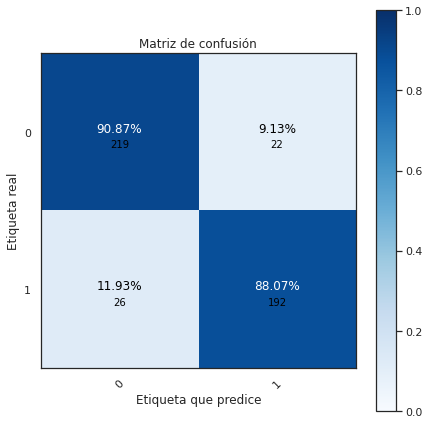

In [ ]:
get_cm(y_test, y_pred)

In [ ]:
def get_cm(true_labels, predicted_labels):
    #get confusion matrix
    labels = np.unique(true_labels) # Antes esta línea tenia lo siguiente: np.unique(predicted_labels)
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    #get plot of confusion matrix
    plot = plot_confusion_matrix(cm, labels)
    return plot

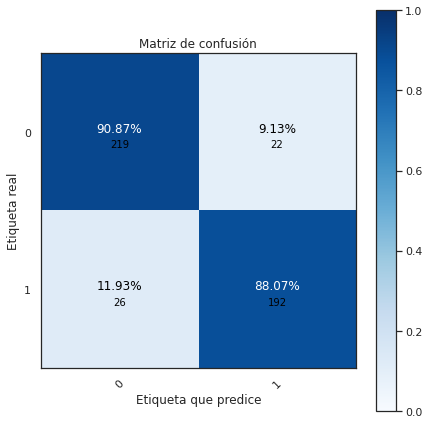

In [ ]:
get_cm(y_test, y_pred)

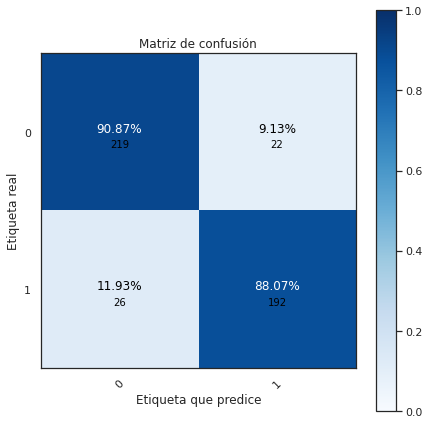

In [ ]:
# Gráfico de la matriz de confusión:
get_cm(y_test, y_pred)

La matriz de confusión para el modelo de `Árbol de decisión` muestra que:

* Para el conjunto testeo con TREE: El modelo predice casi un 70,5% de los clientes que NO caerán en DEFAULT, basicamente los clientes confiables. Respecto al 29,5% restante que el modelo no pudo predecir correctamente, significará un costo asociado a la aelección del cliente. Respecto a los clientes que caen en DEFAULT, el modelo predice un 55,45% de los clientes que SI caerán en DEFAULT. Y por otro lado, existe un error cercano al 44,55%, que el modelo no pudo predecir, y de igual manera que los modelos anteriores, significará un alto costo para el banco si acepta clientes sin la certeza de su condición financiera.

9. ENTRENAMIENTO

9.1 SVM

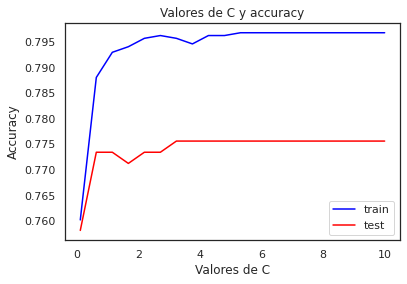

In [ ]:
from sklearn.svm import SVC
# Entrenamiento para distintos números de C
accuracie_train = []
accuracie_test = []
# Valores para C
C = np.linspace(0.1,10,20)
for c in C:
  # Entrenamiento:
  SVM = SVC(random_state=0, C=c, kernel='linear').fit(X_train,y_train)
  # Predicción y guardar accuracy
  accuracie_train.append(accuracy_score(y_train, SVM.predict(X_train)))
  accuracie_test.append(accuracy_score(y_test, SVM.predict(X_test)))

# Gráfico:
plt.plot(C,accuracie_train, color='blue')
plt.plot(C,accuracie_test, color='red')
plt.title('Valores de C y accuracy')
plt.xlabel('Valores de C')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')

Podemos observar que existe un margen entre las clases de 6 puntos aproximados, lo cual indica que es buen modelo, ya que la separación entre ambas líneas de entrenamiento y testeo permite determinar de mejor manera cada clase.

El valor de C que ocuparemos será: 0.1

9.2 RANDOM FOREST

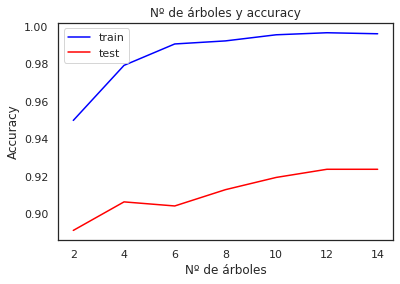

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Entrenamiento para diferente número de árboles:
accuracie_train = []
accuracie_test = []
# Número de árboles 
n_estimators = list(range(2,15,2))
for n_estimator in n_estimators:
  # Entrenamiento
  RF = RandomForestClassifier(n_estimators=n_estimator, random_state=9, n_jobs=-1).fit(X_train,y_train)
  # Predict y guardar accuracy
  accuracie_train.append(accuracy_score(y_train, RF.predict(X_train)))
  accuracie_test.append(accuracy_score(y_test, RF.predict(X_test)))

# Gráfico
plt.plot(n_estimators,accuracie_train, color='blue')
plt.plot(n_estimators,accuracie_test, color='red')
plt.title('Nº de árboles y accuracy')
plt.xlabel('Nº de árboles')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

El gráfico muestra que una cantidad óptima de árboles es 6, con mayor cantidad de árboles el modelo comienza a sobreajustarse.

Además, debemos considerar que cada árbol se entrena con un porcentaje de los datos, no utiliza todas los datos de las clases. También, tomamos atributos de forma aleatoria, por lo que puede sesgarse y no ser representativo. En este caso, la cantidad de datos no es la óptima para utilizar Random Forest, por lo que el modelo tenderá a sobreajustarse.

9.3 ARBOL DE DESICIÓN

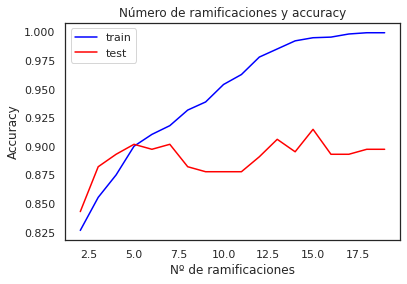

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Entrenamiento para diferente número de neuronas en capas ocultas
accuracie_train = []
accuracie_test = []
# Número de árboles 
depths = list(range(2,20))
for depth in depths:
  # Entrenamiento
  TREE = DecisionTreeClassifier(random_state=0, max_depth = depth).fit(X_train,y_train)
  # Predict y guardar accuracy
  accuracie_train.append(accuracy_score(y_train, TREE.predict(X_train)))
  accuracie_test.append(accuracy_score(y_test, TREE.predict(X_test)))

# Gráfico
plt.plot(depths,accuracie_train, color='blue')
plt.plot(depths,accuracie_test, color='red')
plt.title('Número de ramificaciones y accuracy')
plt.xlabel('Nº de ramificaciones')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

Se puede observar en el caso del Árbol de decisión que el Accuracy se estabiliza a contar de la ramificación n° 12.5 aproximadamente, por tanto la consideramos que una cantidad óptima de ramificaciones es de 11, superior a esto el modelo comienza a sobreajustarse.

10. EVALUACIÓN

10.1 PROBABILIDAD EN  PREDICT

In [ ]:
# Creemos un Dataframe en el que podamos comparar los resultados de nuestras predicciones vs la etiqueta real
data1_test = pd.concat([X_test,y_test], axis=1)
print(f"Filas: {len(data1)}")
data1_test.head()

NameError: ignored

In [ ]:
# Entrenamos con el mejor valor de C
SVM = SVC(random_state=0, C=0.1, probability=True).fit(X_train,y_train)
# Predecir probabilidades
data1_test[['NO','SI']] = SVM.predict_proba(X_test)
data1_test.head()     

En el dataframe de testeo se puede extraer la probabilidades estimadas por los modelos de predicción de las clases. Con dicha probabilidad podemos establecer un umbral desde el cual se determinará que la predicción corresponderá a una u otra clase, lo que determinará a su vez, en gran medida las métricas de desempeño de la predicción.

In [ ]:
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, accuracy_score

# definimos el umbral desde el cual diremos que una persona pertenece a una clase u otra
threshold = 0.5
# creamos nueva columna de predicción (2 formas distintas, pero equivalentes)
data1_test['predict'] = np.where(data1_test['SI']>threshold, "SI", "NO") # forma 1
data1_test['predict'] = data1_test['SI'].apply(lambda x: "SI" if x>threshold else "NO") # forma 2
# métricas
print(f"Accuracy  : {round(accuracy_score(data1_test['DEFAULT'], data1_test['predict']),3)}")
print(f"Recall    : {round(recall_score(data1_test['DEFAULT'], data1_test['predict'], average='macro'),3)}")
print(f"Precision : {round(precision_score(data1_test['DEFAULT'], data1_test['predict'], average='macro'),3)}")

data1_test.head()

Con un umbral de 0.5 vemos que las métricas Accuracy, Recall y Precision tienen un valor aproximado a 0.7. Considerando esto, se utilizará este valor para definir el corte de clases.

In [ ]:
plt.figure(figsize=(16, 8))
# Probabilidad estimada de caer en DEFAULT, para ambos resultados
ax = sns.histplot(x = "SI" , hue='DEFAULT', data = data1_test, kde=False, bins=30, palette='dark')
plt.title('Distribución de probabilidad por clase', fontsize=16)
ax.set_xlabel('Probabilidad', fontsize=15)
ax.set_ylabel('Frecuencia', fontsize=15)
# Marcar zona en predict = NO
ax.axvline(x=threshold, color='r')
ax.axvspan(0,threshold, color='#EF9A9A', alpha=0.3)

Según la gráfica, observamos que el modelo incurre en errores tanto para definir DEFAULT "SI" y "NO" con un umbral de 0.5. También, observamos que existen casos en los que NO se cae en DEFAULT cuando el modelo indica que SI caerán. Dicho esto, existen casos donde NO se cae en DEFAULT, pero el modelo indicó que SI. Ante esta situación, se puede realizar un doble check u otro análisis complementario, ya que lo que buscamos con las predicciones es que el Banco no incurra en costos por una mala clasificación de los clientes.

También debemos considerar que existen errores en cuanto a la predicción de casos donde SI existe DEFAULT, pero el modelo indica que NO, generando nuevamente un gasto para el negocio cuando el modelo no predice de manera óptima.

10.2 PLOT ROC

In [ ]:
from sklearn.metrics import roc_curve
metrics.plot_roc_curve(SVM, X_train, y_train)
plt.show()

Representamos AUC/ROC en SVM y observamos un AUC de 0.84 en train, lo que nos indica que el modelo genera un buen Balanceo.

In [ ]:
from sklearn.metrics import roc_curve
metrics.plot_roc_curve(logit, X_train, y_train)
plt.show()

Representamos AUC/ROC en LOGIT, y observamos un AUC de 0.85 en train, lo que nos indica que el modelo genera un buen Balanceo, incluso mejor que SVM.

In [ ]:
from sklearn.metrics import roc_curve
metrics.plot_roc_curve(RF, X_train, y_train)
plt.show()

Representamos AUC/ROC en RF, y observamos un AUC de 1.0 en train, lo que nos indica que el modelo tiende a sobreajustarse, ya que no se observan casos Falsos Positivos. Esto ya fue explicado en el módulo de entrenamiento de Random Forest.



---


##**10. Propuestas de Políticas Comerciales:**

1) Acciones comerciales diferenciadas por segmento de clientes del Banco.

2) Dado que el nivel de renta sigue siendo el principal factor por el cual segmentan a los clientes los bancos e instituciones financieras en Chile, no se debe subestimar el valor de esta variable para adoptar cualquier acción comercial que se proponga.


Ya es conocido, que es mucho mas rentable para un negocio retener a un cliente que buscar nuevos clientes. Las estrategias de retención de clientes deben estar orientadas al análisis que poseemos de los mismos, es decir, las categorías y segmentos de clientes que el negocio determine relevante para su beneficio y sostenimiento temporal.
Para el presente trabajo hemos determinado x perfiles de clientes y políticas estratégicas que nos ayudarán a mejorar la fidelidad de los mismos en pos de prevenir o disminuir la fuga a la competencia.

**Política general**

En términos generales podemos ofrecer condiciones especiales de intereses y repactación de deudas (si las hay) a clientes que cumplan una serie de requisitos previos.
Por ejemplo, clientes que posean más de un crédito hipotecario, cuenta corrientistas podrán optar a la rebaja de la tasa de interés (0,2-0,5%) . Respecto a la repactación de deudas, los mismos clientes que posean problemas en pagar montos específicos podrán optar a rebajas en los dividendos modificando los años de pago sin alterar el monto total de la deuda en UF con ciertas condiciones especiales.
Políticas de fidelización y estrategias conjuntas.
Dependiendo de los segmentos de edad, sexo, ubicación geográfica y tipo de cliente ( gold, silver, bronce, estándar) se generaran una serie de beneficios que incluirán comercios asociados con beneficios especiales para cada segmento y tipo de cliente.
Casas comerciales
Spa, resorts, centros de vacaciones
Actividades al aire libre, box de deportes, salud deportiva.
Entretención como cines, pubs, restorant, etc.

Otro aspecto relevante es el correcto funcionamiento de la tecnología y procesos organicos del negocio en concordancia con análisis de data de los mismos clientes.

Por ejemplo, si dentro del análisis de dolores, reclamos y mejoras aparecen aspectos relacionados con las aplicaciones, tarjetas y reposición de las mismas, tiempos de espera en call center, tramites web limitados, etc. Se deben crear planes en conjunto que ASEGUREN mejoras a corto, mediano y largo plazo para estos problemas. Esto se debe medir mediante el seguimiento de grupos de clientes clave que permitan determinar mejoras continuas ( generalmente la metrica utilizada para medir este tipo de mejoras es el NPS)
Aspectos a considerar siempre ¡¡
Ciclo de vida del cliente (métricas que lo consideren)
Momentos de consumo
Propensión al consumo
Valor actual del cliente
Valor potencial del cliente




---

## **11. Conclusiones y Discusiones**